In [408]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import os
import importlib
import pickle
import qutip as qt

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results/'

In [409]:
GHz     =   1e9
fF      =   1e-15
nH      =   1e-9
nmax_r  =   5
nmax_f  =   15

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [245]:
experiment_name = 'qubit_1_single_1'
load = False
method = 'SLSQP'
# method = 'Nedler-Mead'
# method = 'L-BFGS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [169]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [170]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [171]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1')
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

### Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

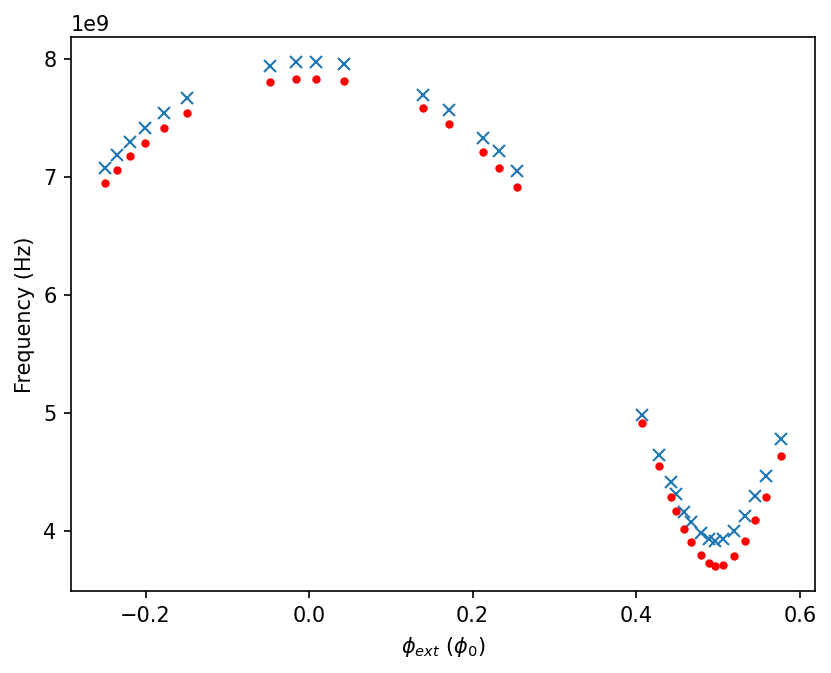

In [172]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [173]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.7186395090895032
2.53411869421262
2.537184886306443
1.0104159070602428
1.748398250974346
2.953678417151215
5.207291279899794
1.4513761089351251
0.27016861950074805
0.3525528336850835
0.5875429987285318
1.891564281172527
0.864187376993245
1.5988481323452894
0.7273706359398393
0.27478306306408196
0.1547955170344992
0.5437916457802254
0.3714409759418607
1.0131343533724548
0.2825182715024277
0.3872023335302793
0.18843127250569325
0.7245695134407021
0.16469521926275837
0.13603754449737887
0.30595050795157963
0.08087207946272712
0.2371088851645412
0.07526592182112676
0.30554959736302595
0.17938262933604712
0.08089911798768683
0.2777390725292861
0.07054481178838912
0.14627433964142056
0.07144375310860987
0.09677022383158898
0.0499182663793576
0.039251679728225554
0.08554080729525393
0.11937021339475778
0.0427892475555004
0.09564558544112628
0.04230851155191848
0.08243924065012025
0.042209942294293895
0.06279903718068065
0.03874634900177732
0.054344600006433645
0.035886259533072985
0.0383287

In [174]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 2.6900e+01
LF_1 = 2.6500e+01
EJ_1 = 5.4000e+00
I0 = 3.1700e-03
I_origin = -1.9350e-03


Optimized parameters 

CF_1 = 2.4377e+01
LF_1 = 2.7736e+01
EJ_1 = 5.0515e+00
I0 = 3.1627e-03
I_origin = -1.9372e-03


### Plot fits and errors

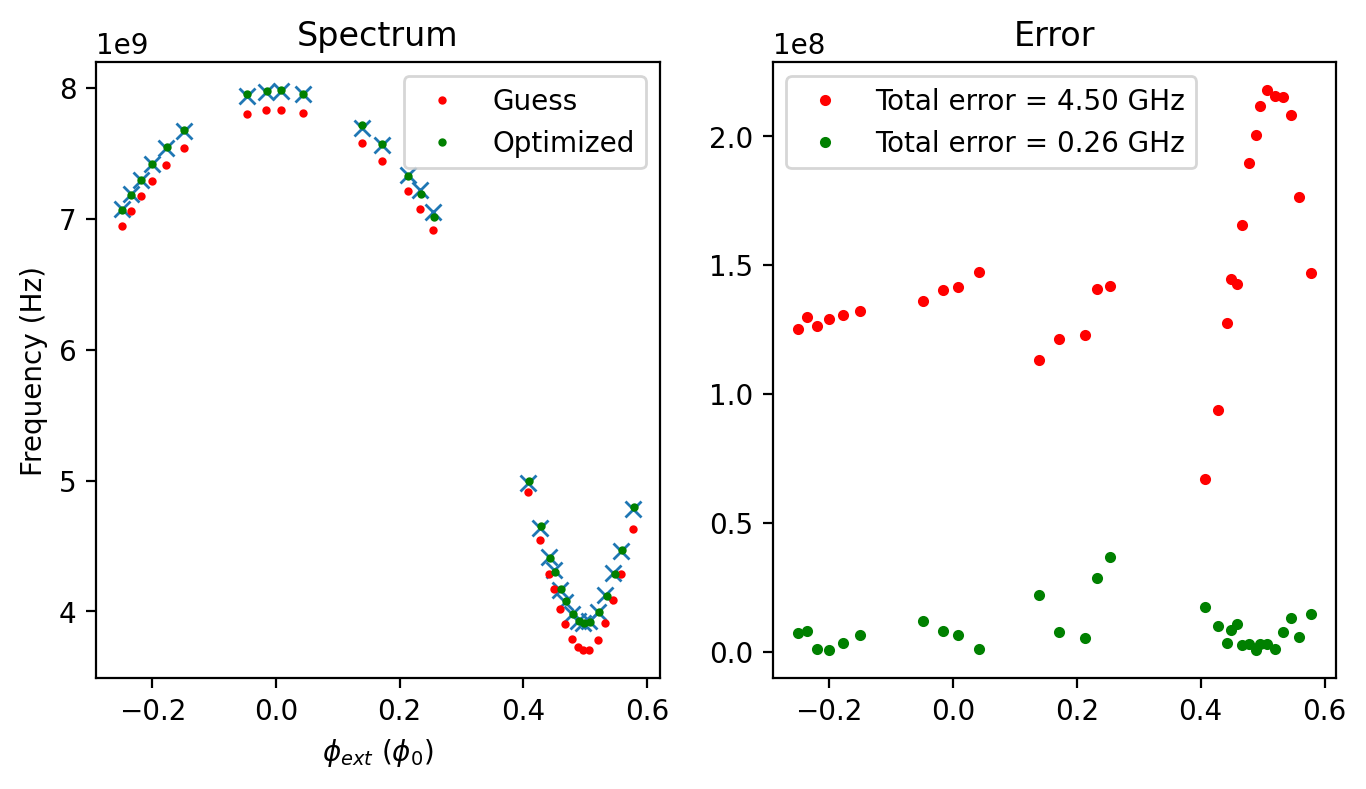

In [175]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [178]:
experiment_name = 'resonator_1_single_1'
load = False
method = 'SLSQP'


### Load spectral data and theoretical model

In [179]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [183]:
CF_1, LF_1, EJ_1, I0_guess, I_origin_guess = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
_, _, _, LR_1, _, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1')


LR_1, CR_1 = sq_ext.ωR_to_LR_CR(6.625, LR=LR_1)

crossing_index_1 = 11
crossing_index_2 = 10
nmax_r=5
nmax_f=15

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, nmax_r, nmax_f ])
parameters_guess = [CR_1, LR_1, Δ_1, I0_guess, I_origin_guess]

parameter_names = ['CR_1', 'LR_1', 'Delta', 'I0', 'I_origin']
bounds = ((2,25), (30,170), (0,2), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

### Plot guess to check

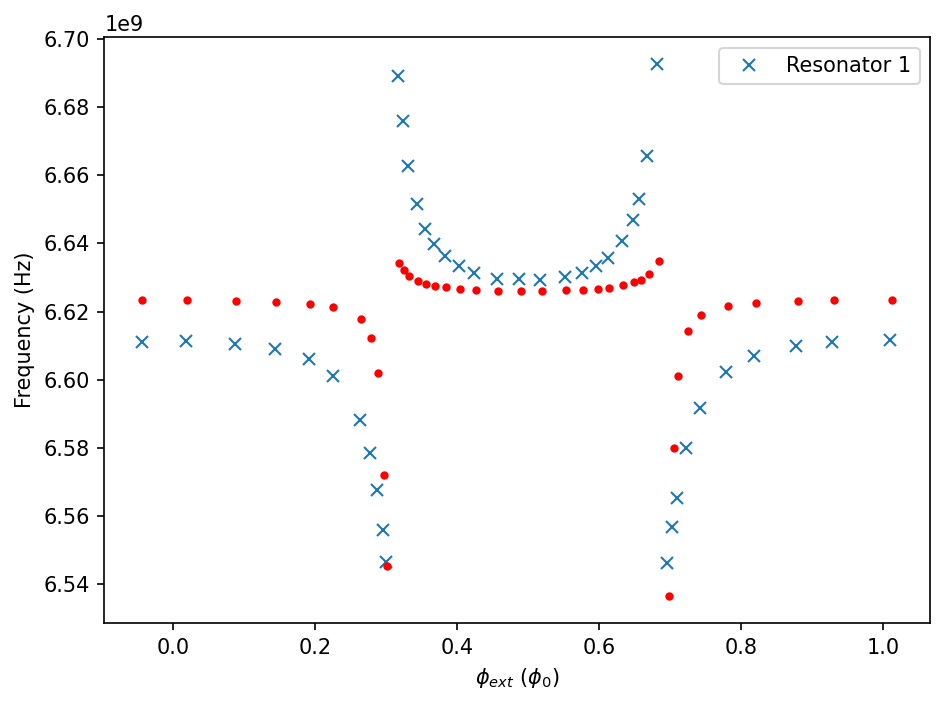

In [184]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [185]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.022552974017740906
0.022552974375449182
0.022552974052051183
0.022552973112112604
0.022552744336069994
0.022553460419784878
0.26493864857266974
0.022107839503129632
0.022107839865457925
0.022107839537361722
0.02210783881134859
0.022107079988991484
0.02210566883405249
8.677793743511138
0.060834419548457024
0.02133864162568527
0.021338640329350178
0.021338641510997826
0.021338640951685063
0.021338831825404646
0.021338289631675472
1.4469489548592502
0.020543024211263316
0.02054301965159827
0.02054302380448341
0.020543023700312323
0.02053952035379454
0.020534044007071327
0.9021682087550361
0.01902496473021782
0.01902496306437521
0.01902496457973227
0.019024964969924115
0.01902311159753779
0.019015614956177148
0.12917902793213762
0.009453651918756144
0.009453655722821063
0.00945365226096773
0.009453651998652403
0.00945713752636411
0.009457136474348779
0.08789742850061226
0.004838217307475586
0.004838219463035074
0.004838217499582686
0.004838217646596941
0.0048404982476869815
0.00483996093

In [186]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CR_1 = 7.2032e+00
LR_1 = 8.0120e+01
Delta = 3.8000e-01
I0 = 3.1627e-03
I_origin = -1.9372e-03


Optimized parameters 

CR_1 = 7.2121e+00
LR_1 = 8.0119e+01
Delta = 9.0519e-01
I0 = 2.9741e-03
I_origin = -1.8427e-03


### Plot fits and errors

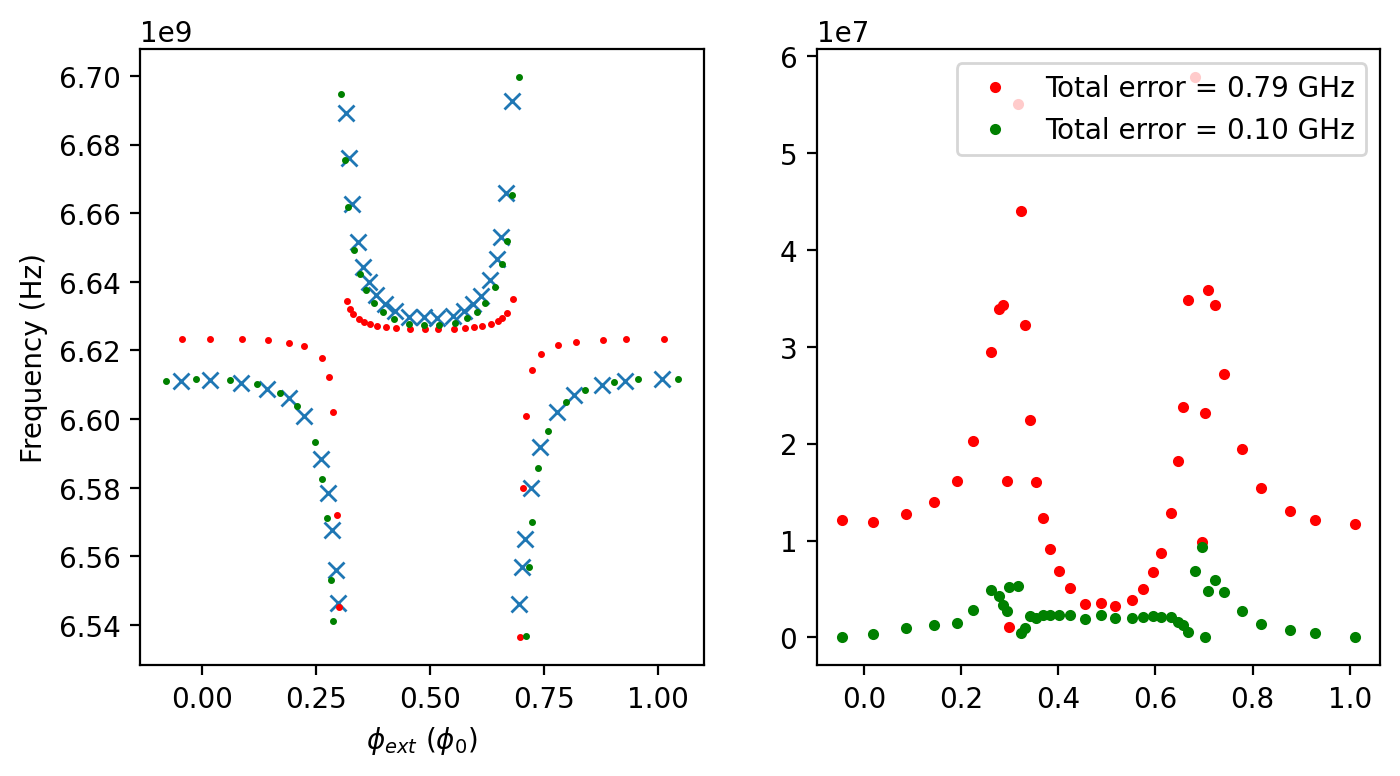

In [187]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

## Qubit 1 and Resonator 1 [Cooldown 1]

In [207]:
experiment_name = 'resonator_and_qubit_1_single_1'
load = False


### Load spectral data and theoretical model

In [208]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [209]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [210]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9), 
          (2,25), (30,170), (0,2), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

### Plot guess to check

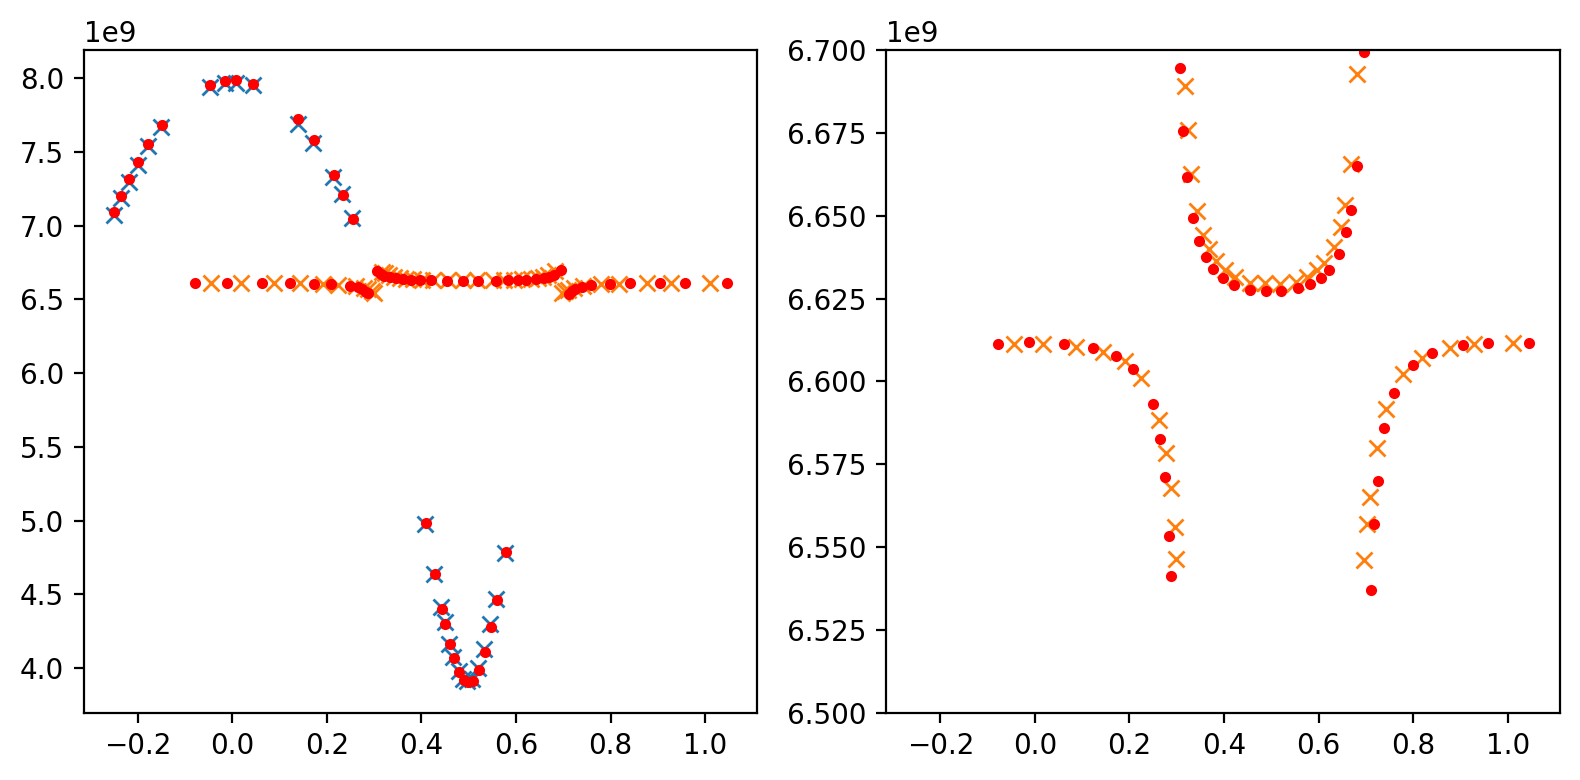

In [211]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
fig.tight_layout()

### Optimize or load previous optimization

In [198]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.006628857298921735
0.006628856784508237
0.006628857297272177
0.00662886074014071
0.006631115219495266
0.00662568634793151
0.006628857254344696
0.006628857293557234
0.006628857538593135
0.006628846730978328
0.006628842219808161
13.210948284314362
0.03691912061337599
0.0053331186128604035
0.0053331182158468686
0.005333118609809113
0.0053331212639251705
0.005336803771906119
0.005338614126997398
0.0053331187097211885
0.005333118620487222
0.005333118806768949
0.005333937624197881
0.005334596241968608
15.770393344666644
0.0802743669678205
0.0031704380810539507
0.003170437936818024
0.003170438089391694
0.0031704390981030315
0.0031665778015132597
0.003163840140909026
0.0031704383370484155
0.0031704381038774824
0.003170438119520659
0.0031705977187995614
0.0031705664348334645
12.236721718613207
0.06374162253764644
0.002517358920295206
0.002517358725589258
0.00251735877875751
0.0025173591149961886
0.0025175723327112527
0.00251916402539019
0.0025173592195601767
0.0025173589472336434
0.0025173589

In [199]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.377
LF_1 = 27.736
EJ_1 = 5.051
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 7.212
LR_1 = 80.119
Δ_1 = 0.905
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 24.389
LF_1 = 27.742
EJ_1 = 5.018
I0_F_1 = 0.003
I_origin_F_1 = -0.002
CR_1 = 7.212
LR_1 = 80.119
Δ_1 = 0.913
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6550000000.0, 6650000000.0)

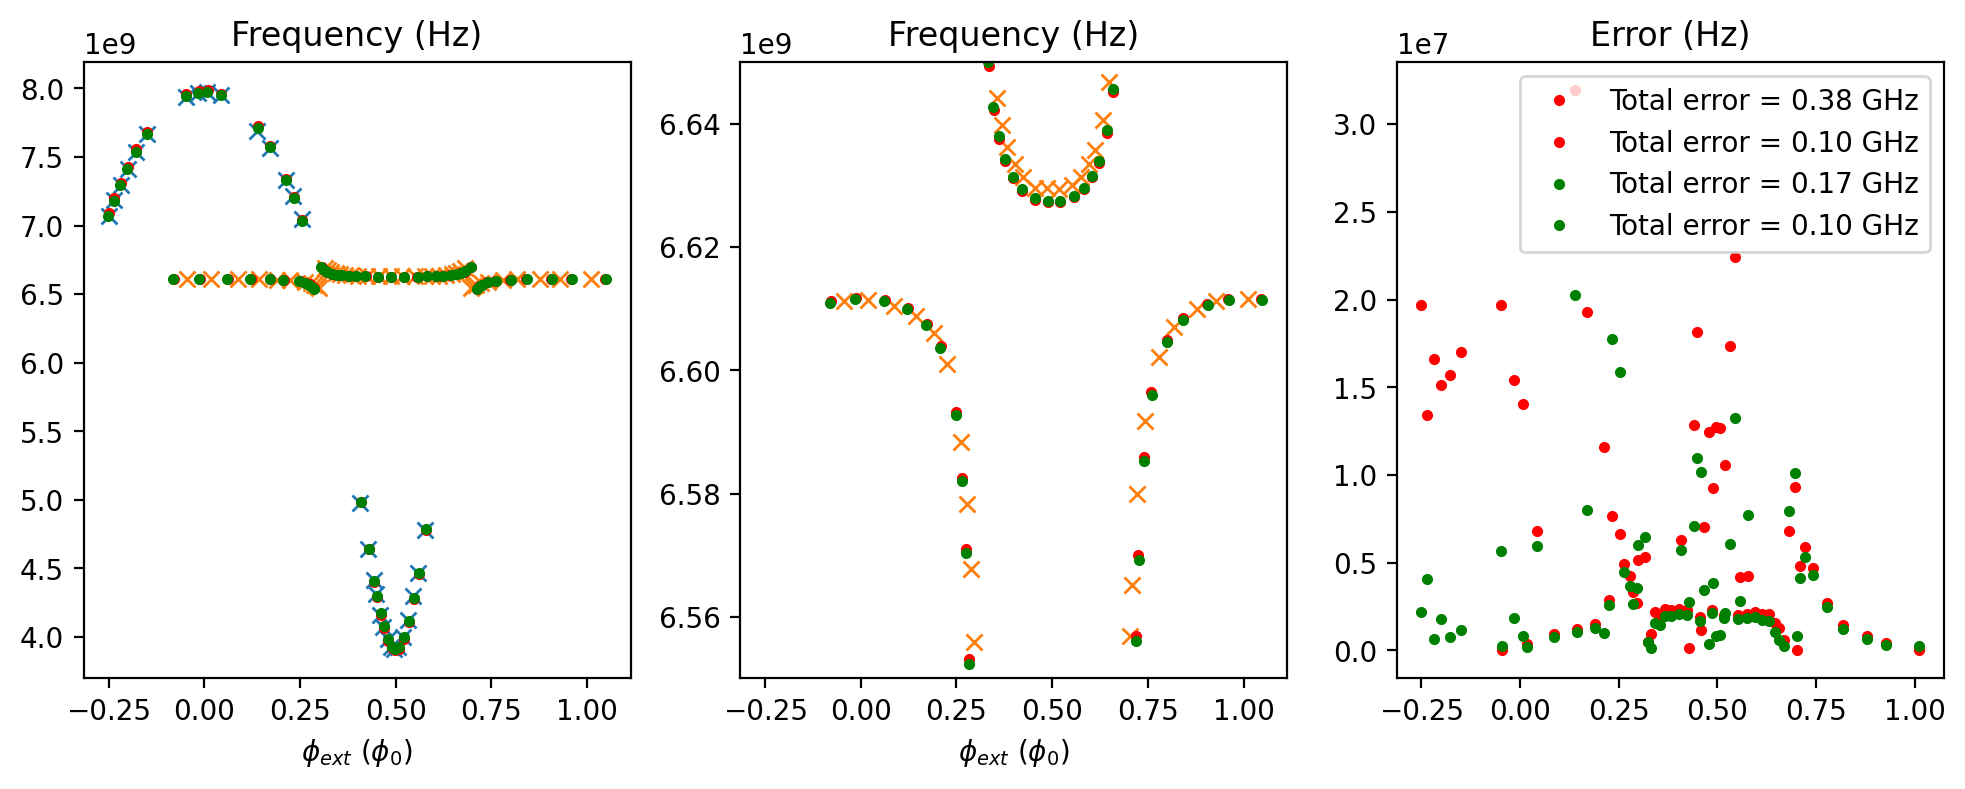

In [212]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.' , label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.' , label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [213]:
experiment_name = 'resonator_and_qubit_1_single_2'
load = False


### Load spectral data and theoretical model

In [214]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [215]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [216]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.8, I0_F_1*1.2), (I_origin_F_1*1.2, I_origin_F_1*0.8), 
          (2,25), (30,170), (0,2), (I0_R_1*0.8, I0_R_1*1.2), (I_origin_R_1*1.2, I_origin_R_1*0.8))

### Plot guess to check

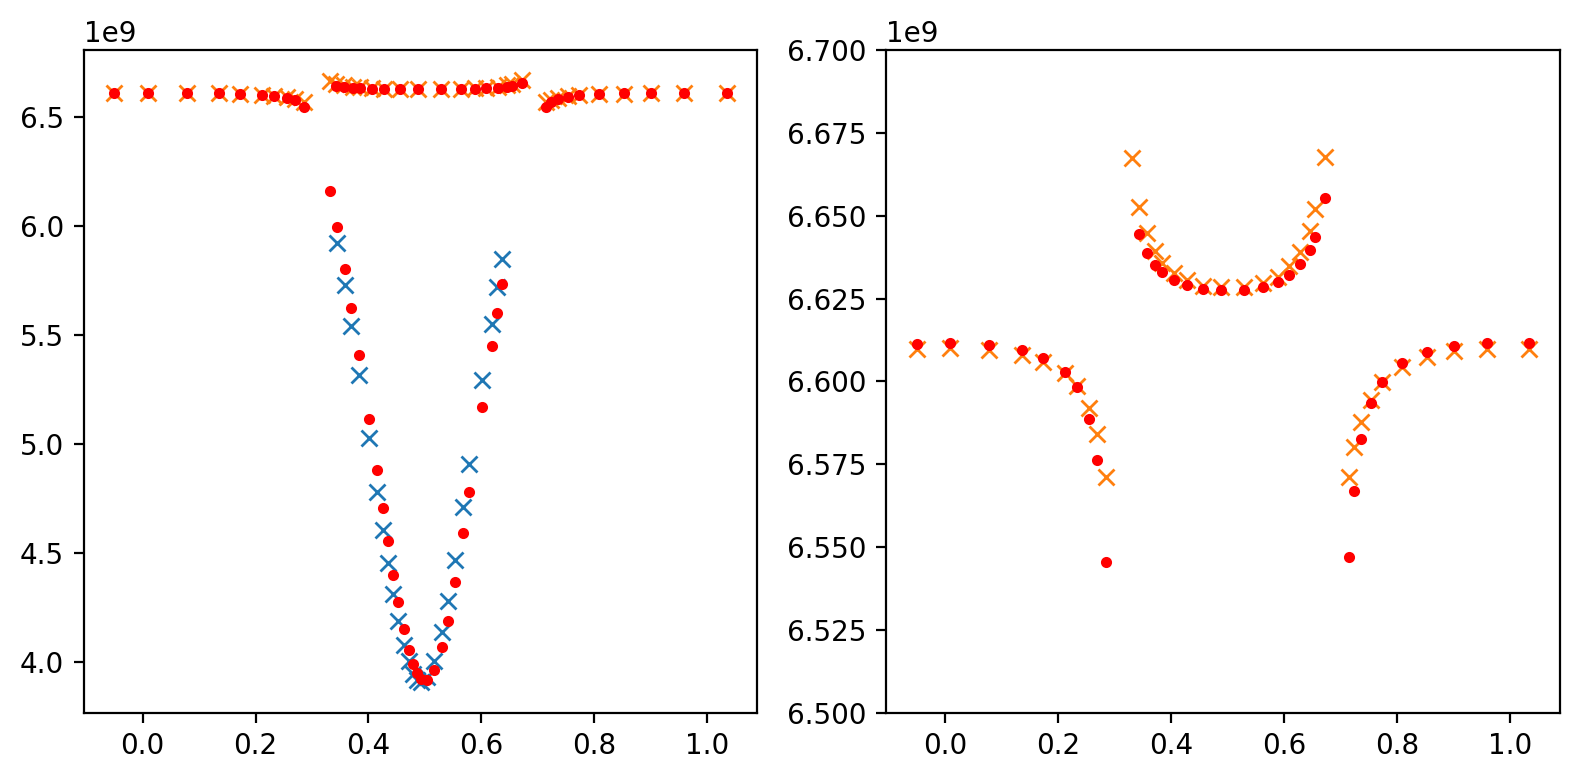

In [217]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [218]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.45568477944544217
0.45568478041826754
0.4556847799601895
0.45568477636546695
0.4557808043807836
0.45587714466867735
0.4556847806936838
0.45568477955379705
0.4556847801530848
0.45567216341190087
0.45564580623229956
73.67025663849498
73.67025663054773
73.67025664788355
73.67025676862316
73.66884536997956
73.66796377220359
73.67025652005354
73.67025662813909
73.67025661509918
73.66981869319223
73.66950657037863
0.22053578764008883
0.22053578853734457
0.2205357881563132
0.22053578525429413
0.22055301462305435
0.22057160524409514
0.22053578837103985
0.22053578770151738
0.22053578839809052
0.2205259218547675
0.2205035181659834
0.1909931613190124
0.19099316209881514
0.1909931617828039
0.1909931594771455
0.19098165199237732
0.19097327864313748
0.19099316181630072
0.1909931613592563
0.19099316210955386
0.19098557018411522
0.1909659557231945
0.1762796249663406
0.17627962566556285
0.1762796253720393
0.17627962331041255
0.17626323817200817
0.1762510325352337
0.1762796253662293
0.1762796249975556

In [219]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.389
LF_1 = 27.742
EJ_1 = 5.018
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 7.212
LR_1 = 80.119
Δ_1 = 0.913
I0_R_1 = 0.003
I_origin_R_1 = -0.000


Optimized parameters 

CF_1 = 24.324
LF_1 = 27.697
EJ_1 = 5.135
I0_F_1 = 0.003
I_origin_F_1 = -0.000
CR_1 = 7.216
LR_1 = 80.120
Δ_1 = 0.861
I0_R_1 = 0.003
I_origin_R_1 = -0.000


### Plot fits and errors

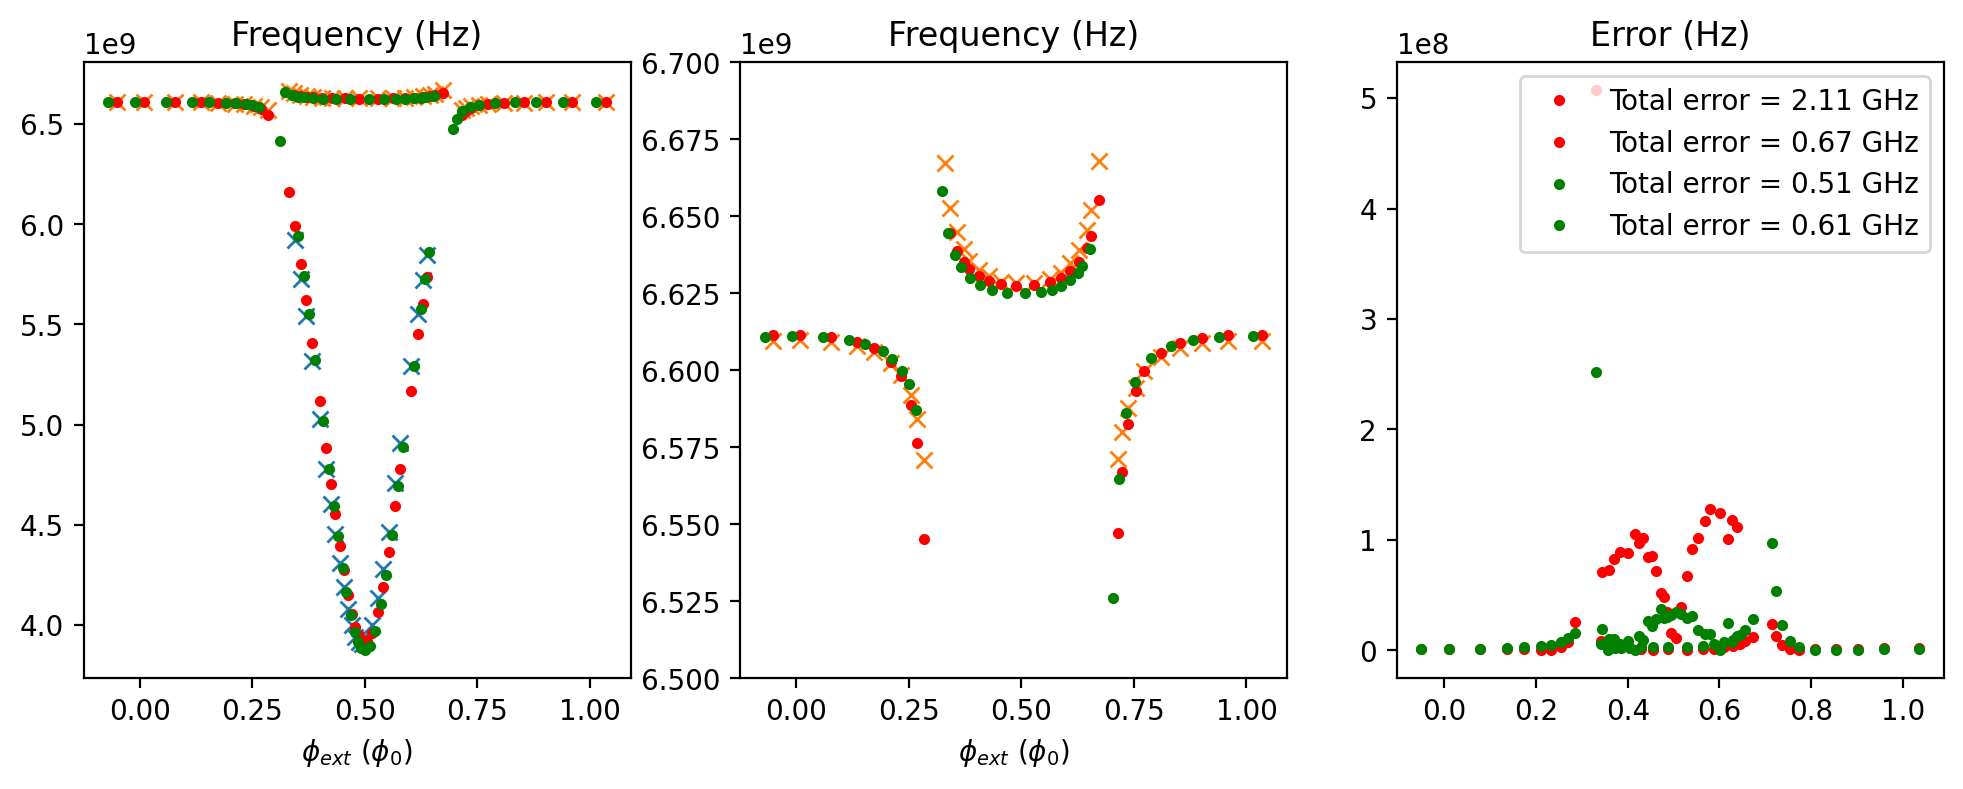

In [220]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [223]:
experiment_name = 'qubit_1'
load = False


### Load spectral data and theoretical model

In [224]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [225]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [226]:
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

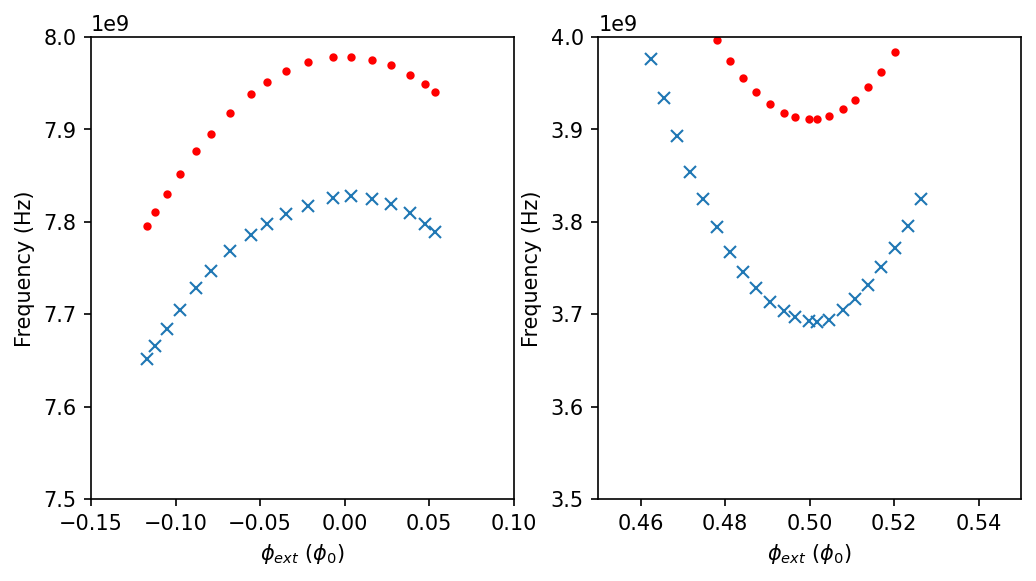

In [227]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_exp, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,8e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.5e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [228]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

1.3568370341516398
1.3568370084997738
1.3568370083080679
1.356837001870944
1.3568665202492711
1.3568769112507328
62.9936147611811
0.8591515934481824
0.8591515736748612
0.8591515785017756
0.8591516068153555
0.8590816107845829
0.858983247223103
25.603756990627282
0.4561538149980125
0.45615380688983237
0.4561538136920861
0.45615385658369567
0.456164554755761
0.45614529052973574
33.915101604652705
0.18513610099405375
0.18513610510580225
0.18513610773800138
0.1851361255062428
0.18510541322551627
0.18506775466300673
20.266618729758463
0.03790107311529815
0.03790107269280144
0.037901071874762646
0.0379010663233981
0.037874623511664623
0.037852788626178156
113.66392881586306
0.32270682390564687
0.024878380106746645
0.024878377956851543
0.024878377729810917
0.024878376200069618
0.024863218316179558
0.024848540092763875
0.28882282859600583
0.021297429196679436
0.021297427441716168
0.021297427198576125
0.021297425547990023
0.021284745646991975
0.021275515442033804
0.42471121908710024
0.0020492013

In [229]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 24.377
LF_1 = 27.736
EJ_1 = 5.051
I0 = 0.003
I_origin = -0.002


Optimized parameters 

CF_1 = 25.462
LF_1 = 28.110
EJ_1 = 5.185
I0 = 0.003
I_origin = -0.002


## Plot fits and errors

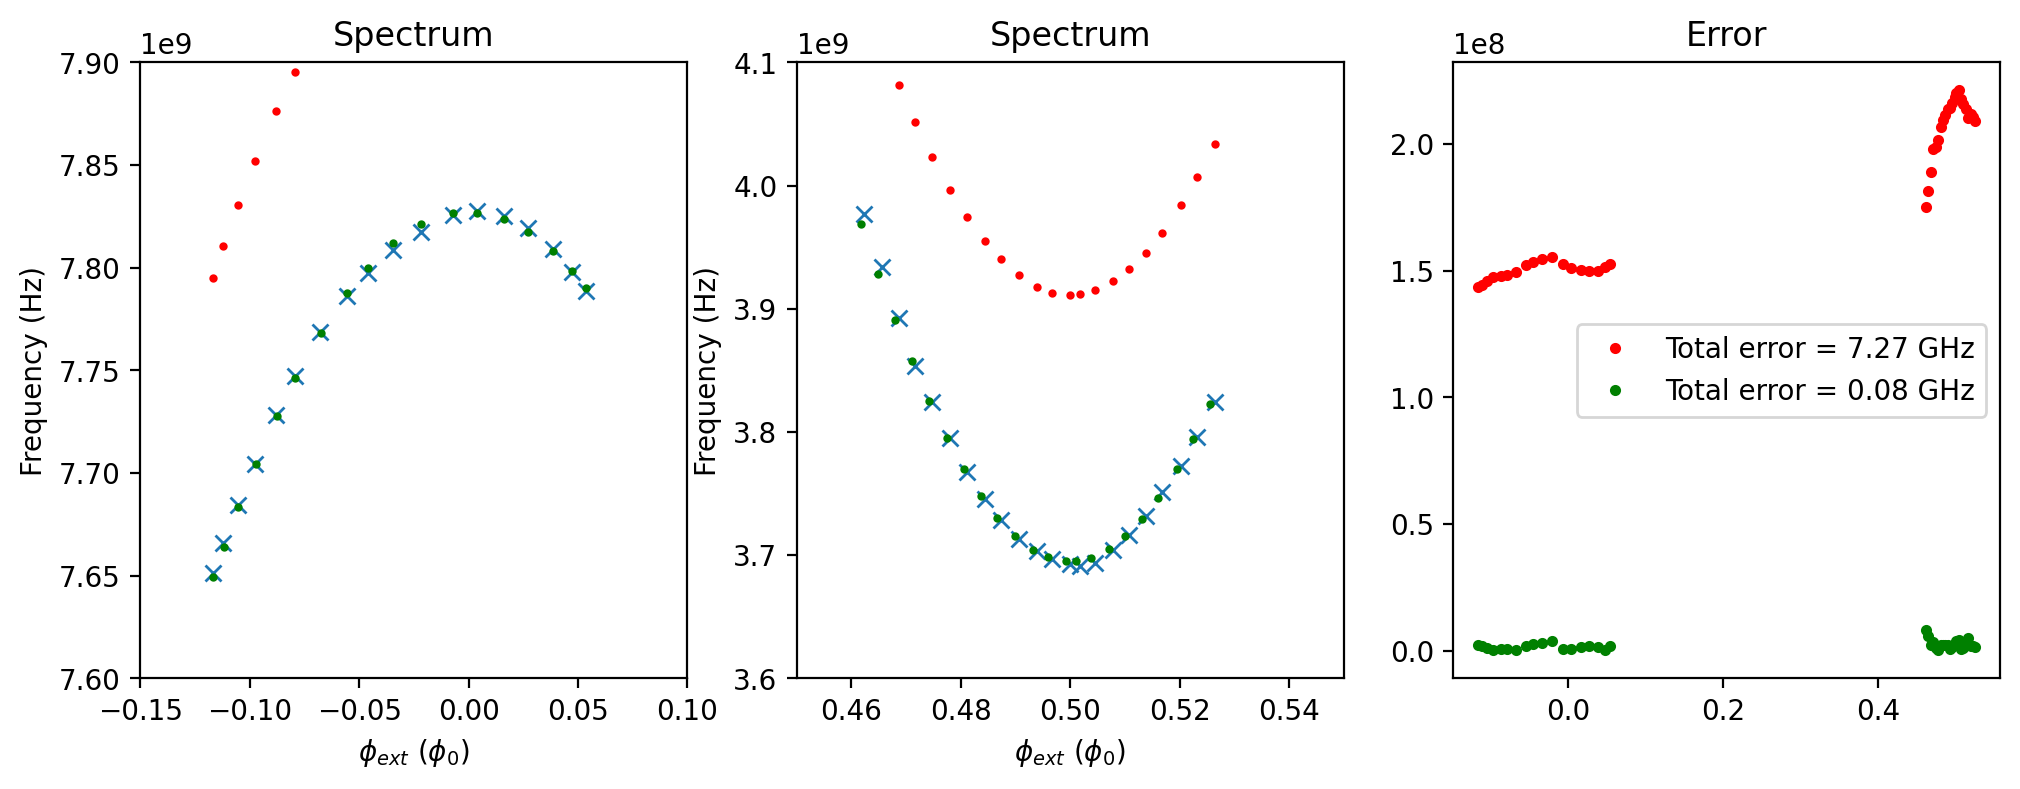

In [230]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.6e9, 7.9e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.6e9, 4.1e9])
ax2.set_xlim([0.45, 0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax3.legend()

# Resonator 1 

In [231]:
experiment_name = 'resonator_1'
load = False

### Load data

In [232]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

## Define cost function

In [233]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [234]:
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
_, _, _, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

C_int = 500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 13
crossing_index_2  = 10
LR_1, CR_1 = sq_ext.ωR_to_LR_CR(6.495, LR=LR_1)

parameter_names = ['C_int', 'CR_1', 'LR_1', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int, CR_1, LR_1 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, Δ_1,  nmax_r, nmax_f ])
bounds= ((10,1000), (2,25),(30,170) ,(I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

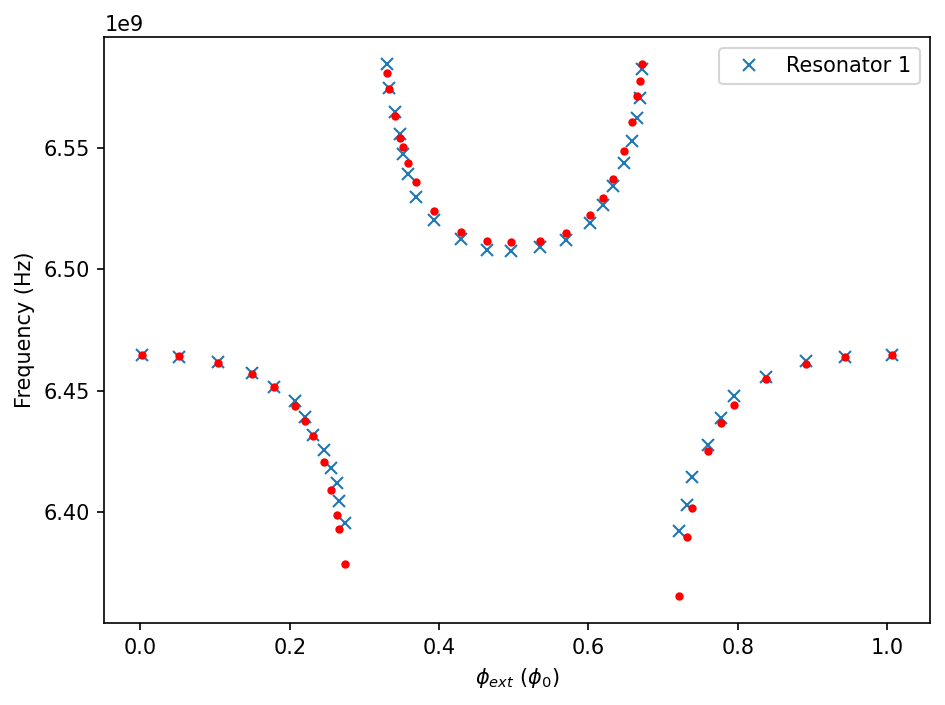

In [235]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [236]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.002190421563397183
0.0013766343412289796
0.9287224315049073
0.9282762610338678
0.09333996755929719
0.061469987768362586
0.3652373624575353
1.4802572805468084
0.1945478718365713
0.5633222343517897
0.06167641529423821
0.27243369909749227
0.04441414129092819
0.16439071605984262
0.014104620764957524
0.1122328500725723
0.01175489593135057
0.08625399501410184
0.01275988700915188
0.052616096405674974
0.012338513950554223
0.01908878931141925
0.004621296125320922
0.012986495314340528
0.0048021198101941935
0.016937532696245847
0.004406081888023209
0.01721773326508292
0.004044274096325734
0.004813769349812101
0.0029302772250446784
0.0033070041244316717
0.00504914913092818
0.002619179551613945
0.004430154505263655
0.002515926789171566
0.003982187891810085
0.0023246953149586675
0.0014225904826698284
0.0019785601312052093
0.0011658540511977247
0.0011360104277514528
0.001637871501076422
0.0007309126911636707
0.0007595395588806299
0.0018136821831602346
0.00120713720725723
0.001108188837005567
0.0008

In [237]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int = 500.000
CR_1 = 7.495
LR_1 = 80.119
I0_guess = 0.003
I_origin_guess = -0.002


Optimized parameters 

C_int = 551.512
CR_1 = 7.481
LR_1 = 80.357
I0_guess = 0.003
I_origin_guess = -0.002


## Plot fits and errors

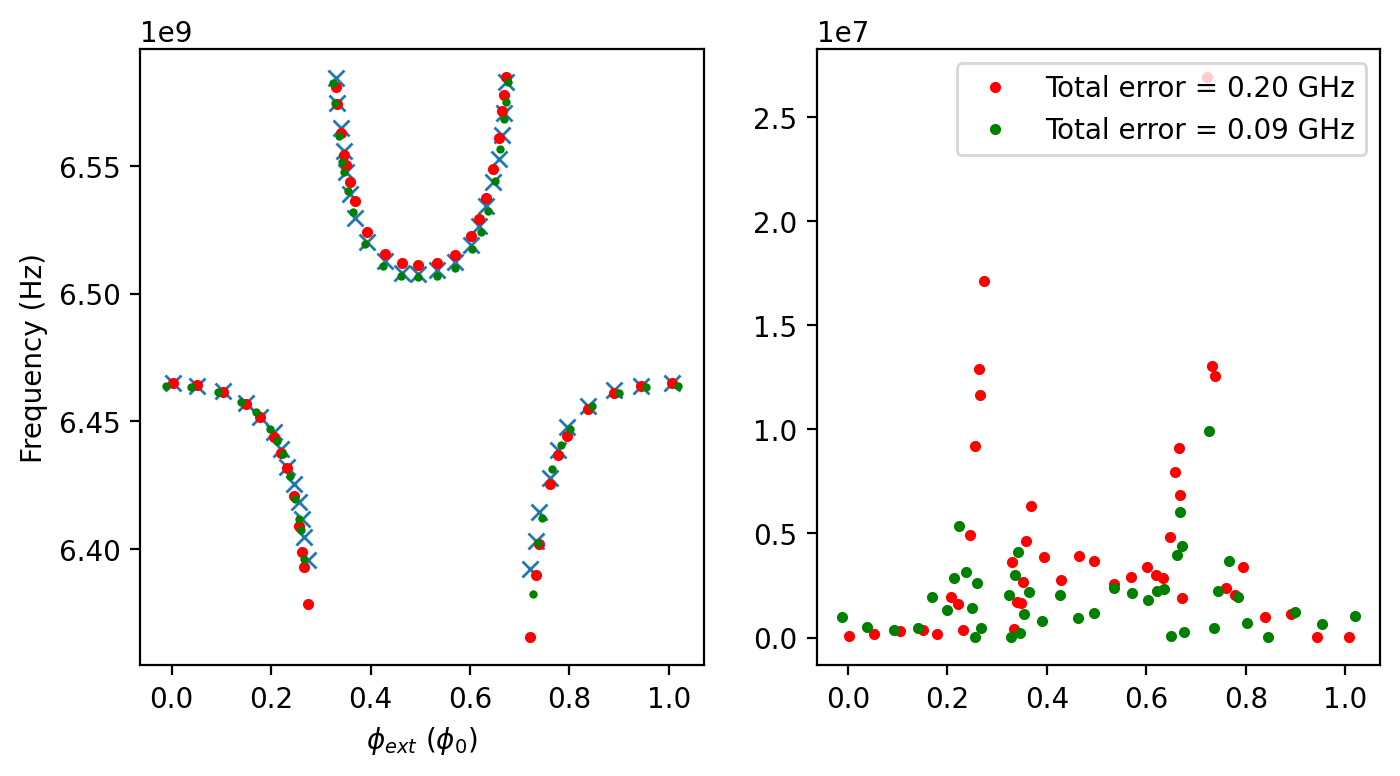

In [238]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

# Qubit 1 and Resonator 1

In [246]:
experiment_name = 'resonator_and_qubit_1'
load = False


### Load spectral data and theoretical model

In [247]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [248]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [250]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int, CR_1, LR_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_R = 13
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_1, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, C_int, CR_1, LR_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'C_int', 'CR_1', 'LR_1', 'I0_R_1', 'I_origin_R_1']

bounds = ((20,30), (20,30), (4,15), (I0_F_1*0.9, I0_F_1*1.1), (I_origin_F_1*1.1, I_origin_F_1*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_1*0.9, I0_R_1*1.1), (I_origin_R_1*1.1, I_origin_R_1*0.9))

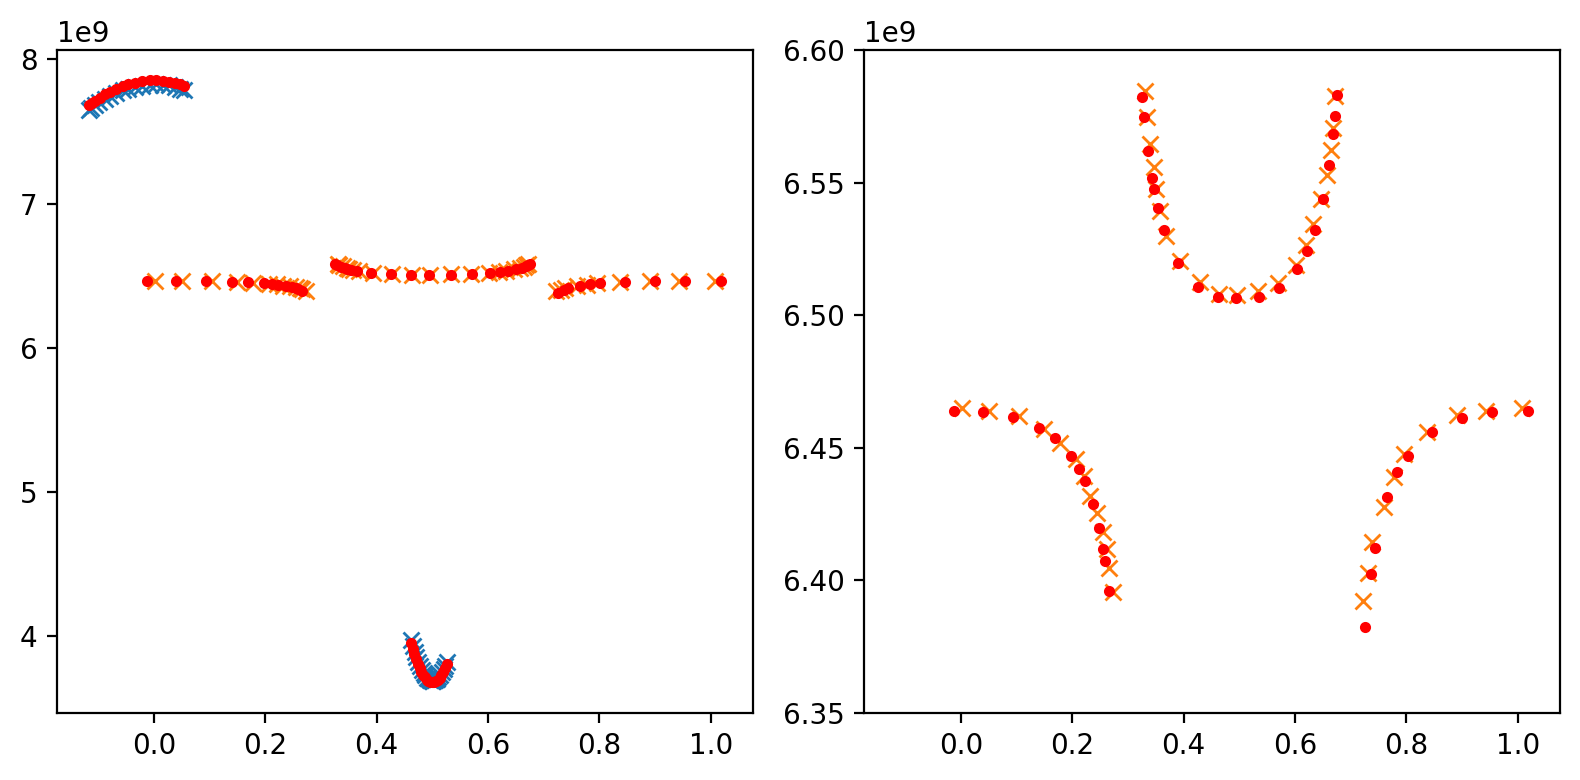

In [251]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.35e9,6.6e9])
fig.tight_layout()

### Optimize or load previous optimization

In [252]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.021277433382755465
0.02127743212684357
0.021277433507595395
0.021277442878993198
0.021274839798523047
0.02126545098589291
0.021277433381849006
0.021277433258959668
0.021277433363742472
0.02127743364439889
0.02127743436482357
34.619661446555845
0.14159243056015514
0.015762197830306687
0.015762196422024602
0.015762197449739623
0.015762204491002563
0.015768415355814205
0.015769749480611554
0.015762197829592987
0.015762197766109695
0.015762197818567306
0.015761779257662357
0.015761391979635487
20.607880163811732
0.05271985916001455
0.0035936335254560642
0.003593632530704853
0.0035936327311930196
0.0035936340785815953
0.0035932809947926475
0.0035909730253055492
0.0035936335251606066
0.0035936342933123085
0.0035936335950211133
0.0035942651403809956
0.0035944963755922704
17.450972763858587
0.14644044303193907
0.0019481020945455142
0.0019481019732398132
0.001948102155627865
0.0019481033675708241
0.0019457339499673418
0.0019423572411714197
0.0019481020943335448
0.0019481035536393397
0.0019481

In [254]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 25.462
LF_1 = 28.110
EJ_1 = 5.185
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 551.512
CR_1 = 7.481
LR_1 = 80.357
I0_R_1 = 0.003
I_origin_R_1 = -0.002


Optimized parameters 

CF_1 = 25.519
LF_1 = 28.131
EJ_1 = 5.131
I0_F_1 = 0.003
I_origin_F_1 = -0.002
C_int = 551.512
CR_1 = 7.480
LR_1 = 80.358
I0_R_1 = 0.003
I_origin_R_1 = -0.002


### Plot fits and errors

(6350000000.0, 6600000000.0)

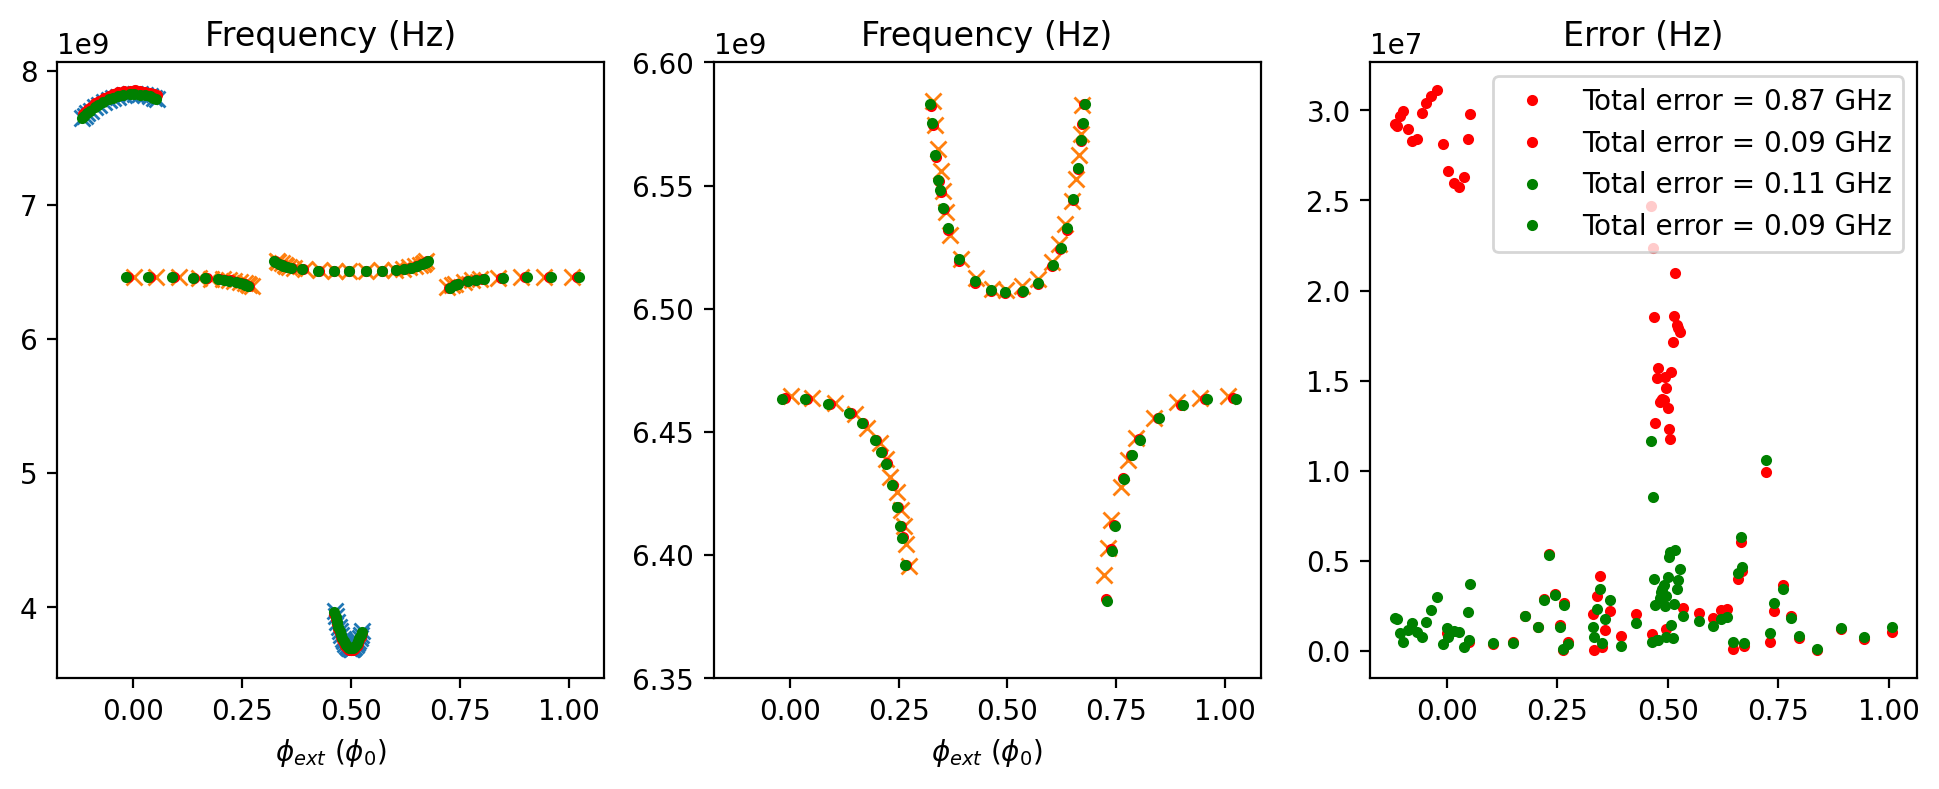

In [255]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


# Qubit 2

In [257]:
experiment_name = 'qubit_2'
load = False


### Load spectral data and theoretical model

In [258]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [259]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [260]:
CR_2, CF_2, LF_2, LR_2, EJ_2, Δ_2, ω_r_2 = sq_ext.get_experimental_parameters('qubit 2')
# CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_2, LF_2, EJ_2, I0_guess, I_origin_guess]

parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

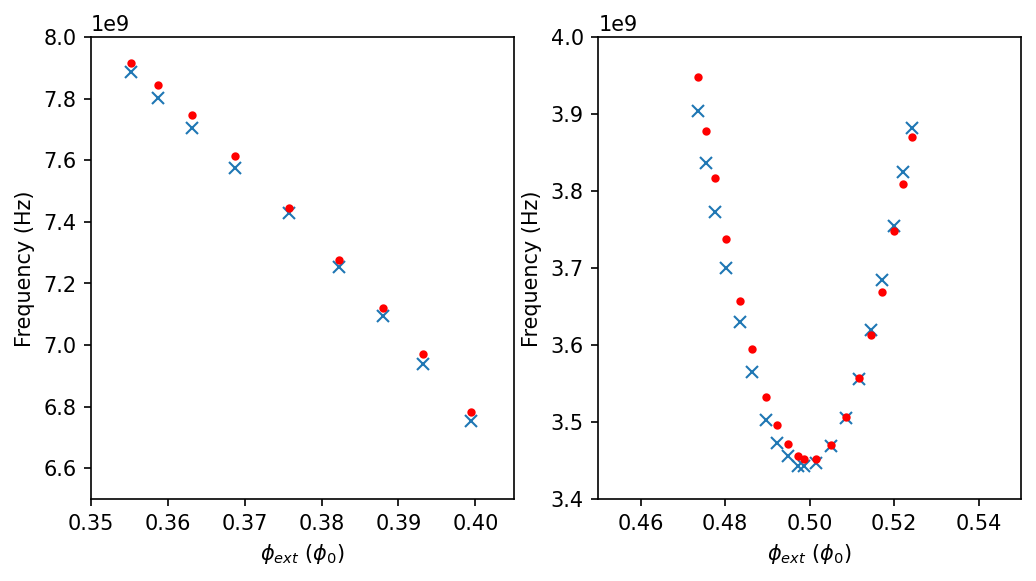

In [261]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_exp, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [262]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.02062932333146304
0.02062932132223175
0.020629320906452506
0.020629323004698358
0.020673032215257445
0.020729140674248754
409.1880924991533
1.7067726175612332
0.004964877648482709
0.004964876691146253
0.004964875875544883
0.004964875345177853
0.004958764441374806
0.004955450620704455
54.33229203448312
2.347430616972315
0.01342697687491527
0.0015656543304841345
0.0015656543129572045
0.001565654431629418
0.0015656547327782835
0.0015610254565576692
0.0015570838554288756
3.2479873719966355
0.03439622190450643
0.00133310867429241
0.0013331087927026903
0.0013331087324571348
0.0013331083838470181
0.0013288199423178541
0.0013233648915591525
0.012591132916626389
0.0014154233199093556
0.0013409806120017649
0.0013344435103299905
0.0013333644008898134
0.001333152629610093
0.0013331114718991492
0.0013331054291328497
0.0013331058894203427
0.0013331069834046135
0.0013331077499080636


In [263]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_2 = 22.400
LF_2 = 20.400
EJ_2 = 9.500
I0 = 0.005
I_origin = -0.005


Optimized parameters 

CF_2 = 22.445
LF_2 = 20.435
EJ_2 = 9.497
I0 = 0.005
I_origin = -0.005


## Plot fits and errors

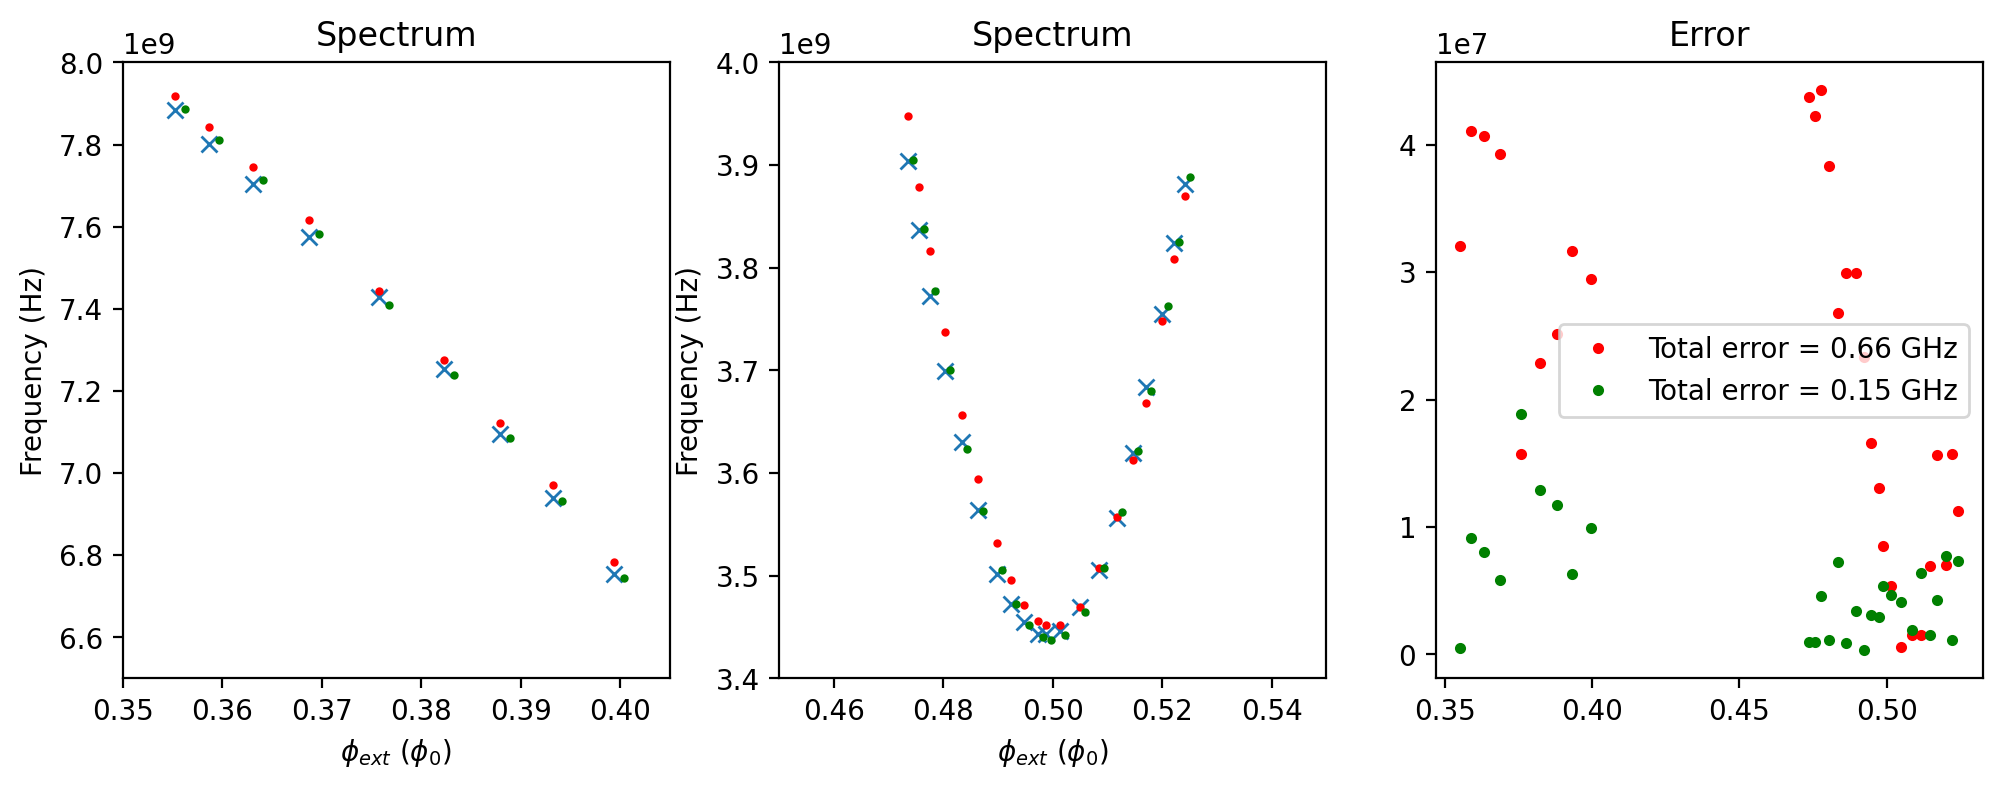

In [264]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax3.legend()

# Resonator 2

In [265]:
experiment_name = 'resonator_2'
load = False

## Load spectral data and theoretical model

In [266]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [267]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [268]:
CR_2, CF_2, LF_2, LR_2, EJ_2, Δ_2, ω_r_2 = sq_ext.get_experimental_parameters('qubit 2')

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 11
crossing_index_2  = 9
LR_2, CR_2 = sq_ext.ωR_to_LR_CR(6.2745, LR=LR_2)

nmax_r = 10
nmax_f = 15 

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_2, LF_2, EJ_2, nmax_r, nmax_f ])
parameters_guess = [CR_2, LR_2, Δ_2, I0_guess, I_origin_guess]
parameter_names = ['CR_2', 'LR_2', 'Delta', 'I0', 'I_origin']
bounds = ((2,25), (30,170), (0,2), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*0.9, I_origin_guess*1.1))

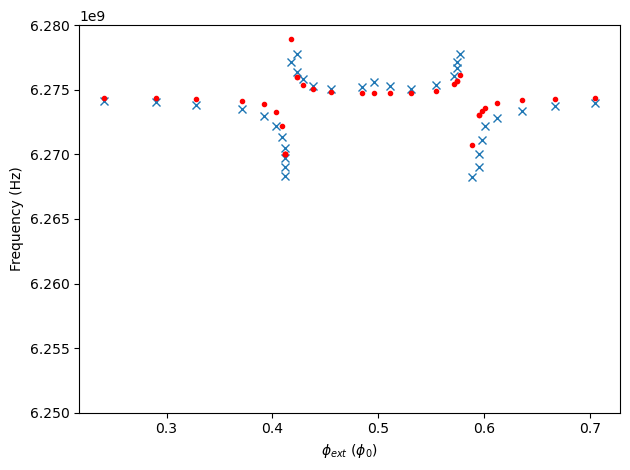

In [269]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax = plt.subplots(dpi=100)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.set_ylim([6.25e9, 6.28e9])
fig.tight_layout()

## Optimize or load previous optimization

In [270]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

6.313280245993234e-05
6.31325932462074e-05
6.313278928734783e-05
6.313278428629637e-05
6.313661662811714e-05
6.315106393228964e-05
31.33822626063145
0.014440625383151067
6.221855344811028e-05


In [271]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CR_2 = 6.368
LR_2 = 101.040
Delta = 0.140
I0 = 0.005
I_origin = 0.000


Optimized parameters 

CR_2 = 6.368
LR_2 = 101.040
Delta = 0.140
I0 = 0.005
I_origin = 0.000


## Plot fits and errors

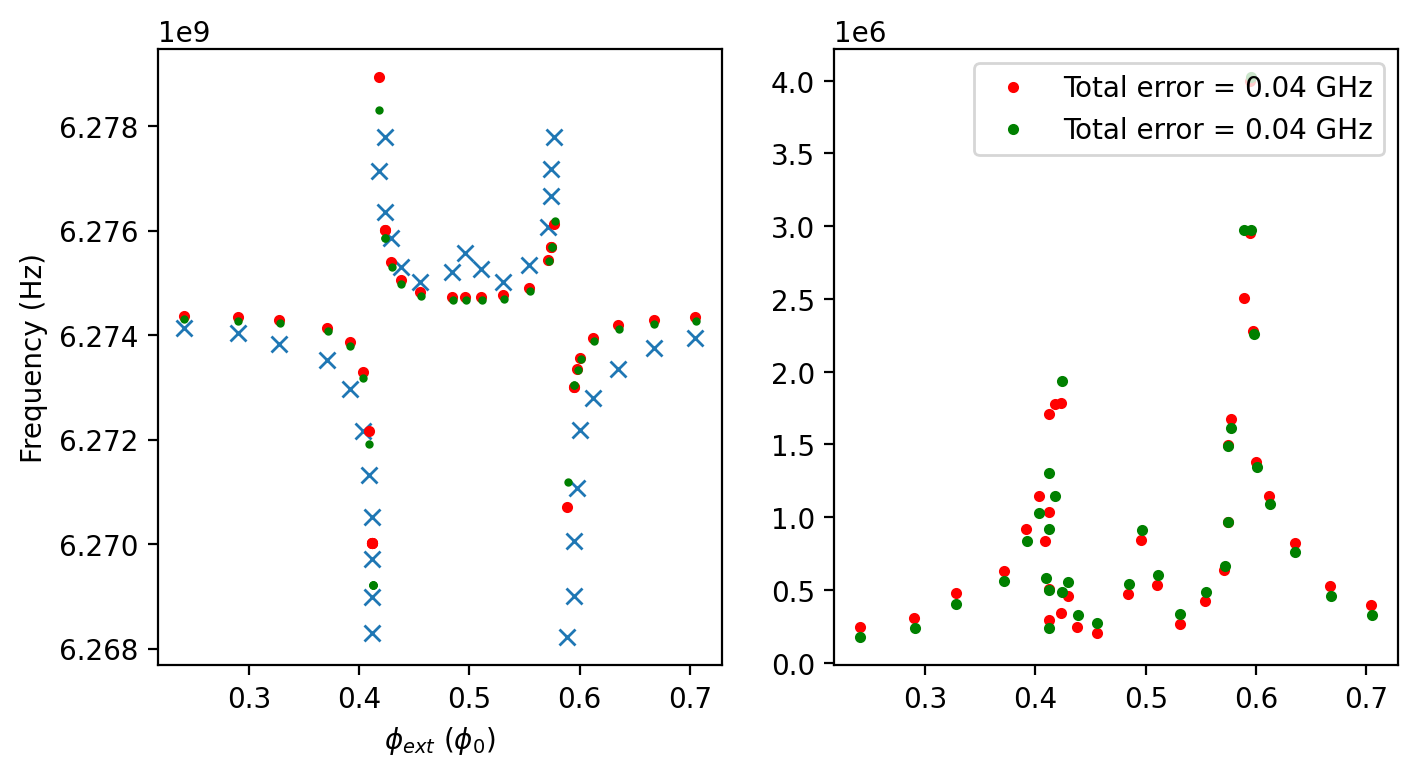

In [272]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

# Qubit 2 and Resonator 2

In [288]:
experiment_name = 'resonator_and_qubit_2'
load = False


### Load spectral data and theoretical model

In [289]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_2')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_2')

In [290]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [304]:
CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, LR_2, Δ_2, I0_R_2, I_origin_R_2 = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']

crossing_index_1_F = 20
crossing_index_1_R = 11
crossing_index_2_R = 9
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2, CR_2, LR_2, Δ_2,  I0_R_2, I_origin_R_2]
parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0_F_2', 'I_origin_F_2',
                   'CR_2', 'LR_2', 'Δ_2', 'I0_R_2', 'I_origin_R_2']

bounds = ((20,30), (20,30), (4,15), (I0_F_2*0.9, I0_F_2*1.1), (I_origin_F_2*1.1, I_origin_F_2*0.9),
          (2,25), (30,170), (0, 2), (I0_R_2*0.9, I0_R_2*1.1), (I_origin_R_2*0.9, I_origin_R_2*1.1))

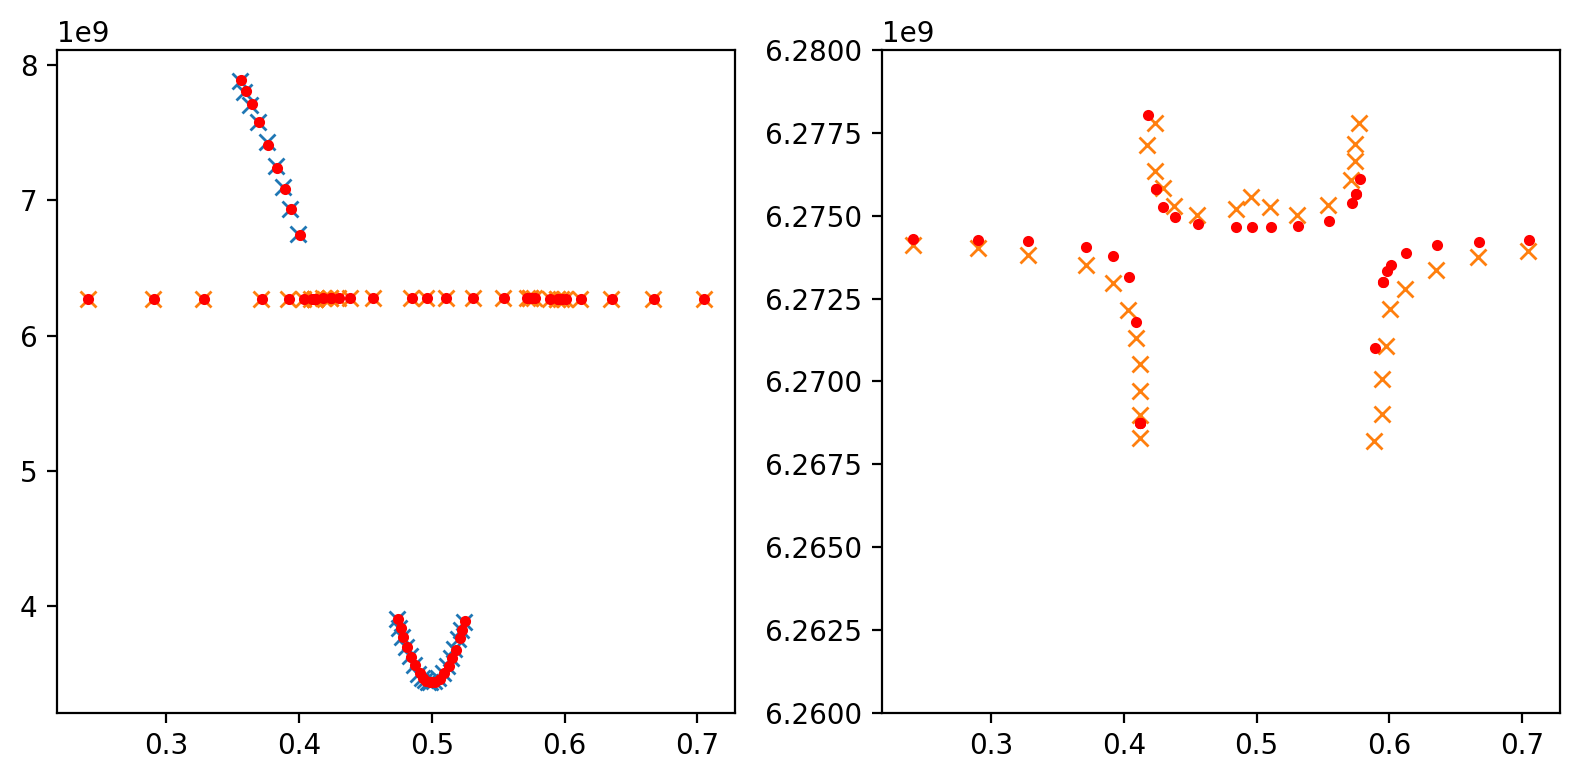

In [305]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.26e9,6.28e9])
fig.tight_layout()

### Optimize or load previous optimization

In [306]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.0013411005315221282
0.0013411006536278376
0.0013411006284289797
0.0013411003605536991
0.0013371203140051507
0.0013321257865460446
0.0013411004348166762
0.0013411005254382953
0.0013411005115870295
0.0013410776280054274
0.0013410531772035002
201.3821649110844
3.0760581672319436
0.02851634962721554
0.00124615323530063
0.001246153230290486
0.0012461532645742586
0.0012461533420426937
0.0012485055589876747
0.0012510579528816682
0.0012461531349637455
0.0012461532289882661
0.001246153221505749
0.0012461329209732534
0.0012461122387594351
31.16379975382433
0.05109677652247586
0.0015617608228485876
0.0012389675887789643
0.0012389675735796242
0.0012389676278530164
0.0012389677700816407
0.0012412609788059906
0.0012439269308828285
0.0012389676153744386
0.0012389675904610597
0.001238967577443593
0.0012389458234735157
0.0012389218617498649
23.81633971844
0.016394041571842467
0.0012603902546372457
0.0012330490729784893
0.0012330490313403836
0.0012330490751741754
0.0012330492333246933
0.00123529134458

In [307]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_2 = 22.445
LF_2 = 20.435
EJ_2 = 9.497
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.040
Δ_2 = 0.140
I0_R_2 = 0.005
I_origin_R_2 = 0.000


Optimized parameters 

CF_2 = 22.440
LF_2 = 20.429
EJ_2 = 9.501
I0_F_2 = 0.005
I_origin_F_2 = -0.005
CR_2 = 6.368
LR_2 = 101.040
Δ_2 = 0.144
I0_R_2 = 0.005
I_origin_R_2 = 0.000


### Plot fits and errors

(6350000000.0, 6600000000.0)

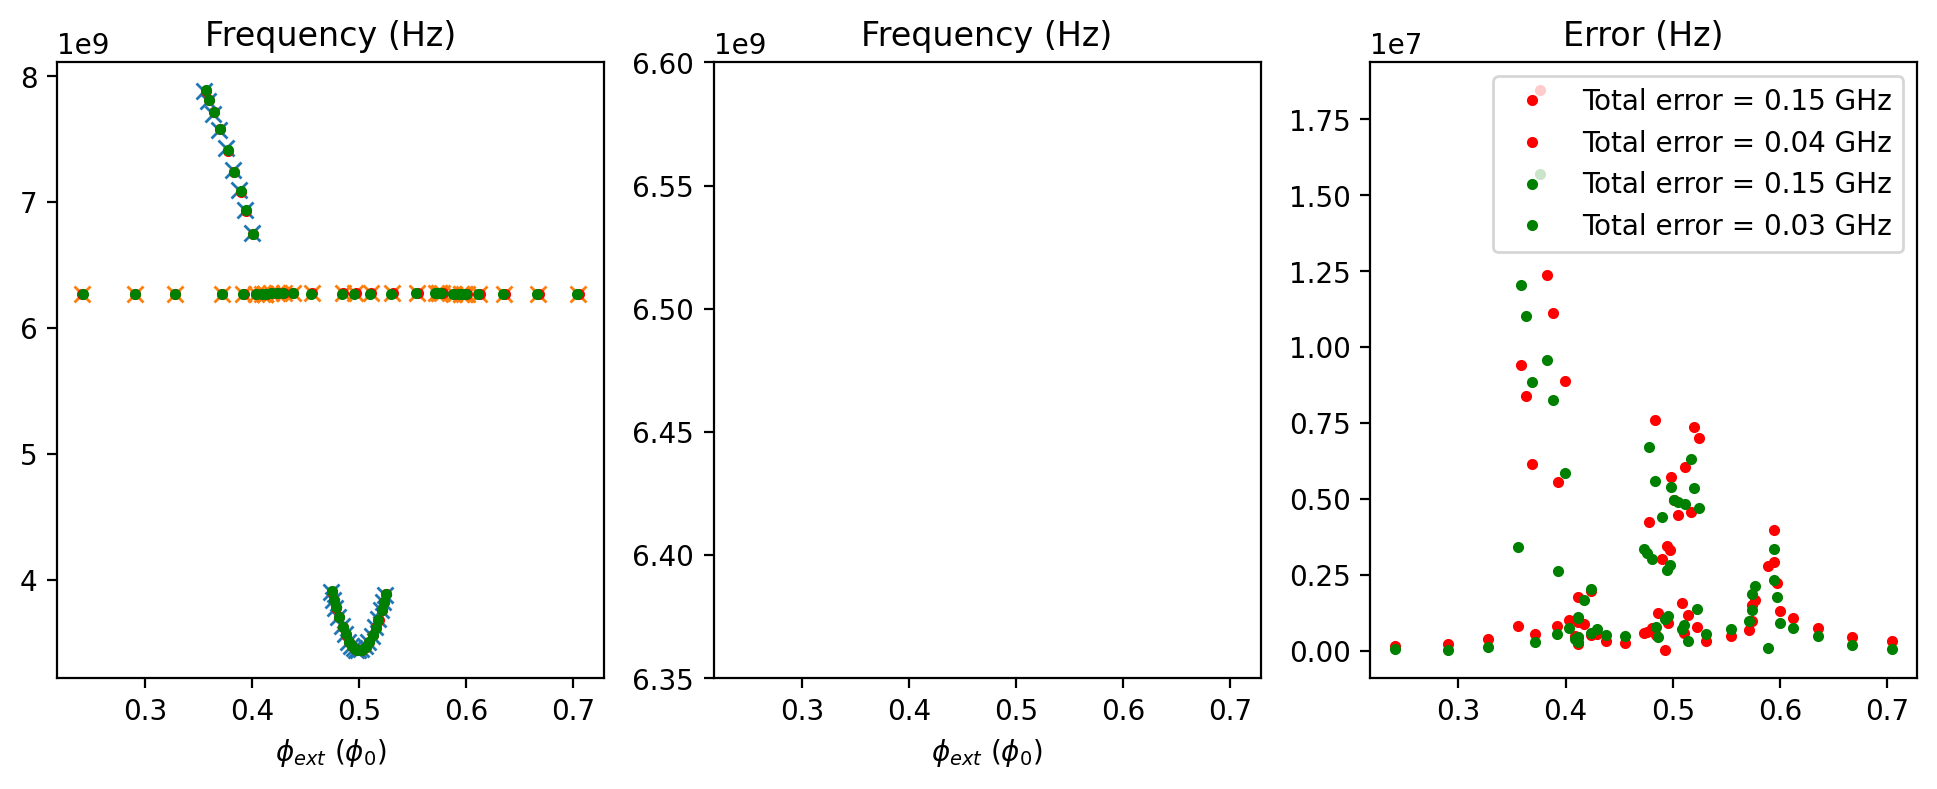

In [308]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


# Qubit 3

In [310]:
experiment_name = 'qubit_3'
load = False


### Load spectral data and theoretical model

In [311]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [312]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [313]:
CR_3, CF_3, LF_3, LR_3, EJ_3, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters('qubit 3')
I0_guess = I0
I_origin_guess = Iss - I0/2
# LF_1= 22.06 #nH
# CF_1= 32.15 #fF
# EJ_1= 6.19 #GHz

parameters_guess = [CF_3, LF_3, EJ_3, I0_guess, I_origin_guess]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0', 'I_origin']
bounds = ((20,30), (20,30), (4,15), (I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

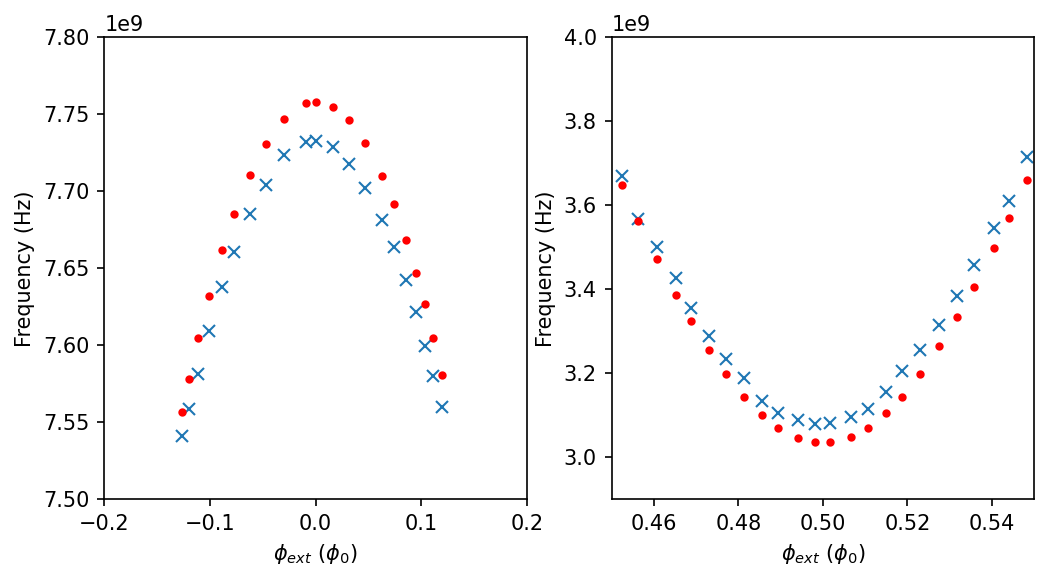

In [317]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_exp, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [318]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

1.6488949640749515
1.6488949351052313
1.6488949893119553
1.6488949465395675
1.6488979709450629
1.6489275037423663
131.3819782567813
1.9973201591228944
1.5624105560723043
1.5624105278679412
1.5624105800338974
1.5624105444071106
1.5622777637541196
1.562171992234025
78.32199606708869
1.4420624617376057
1.1928372249386285
1.1928371997779
1.19283724121263
1.1928372532752314
1.192807747045617
1.1927797785103744
9.088975665965478
0.07742169565567503
0.07742169650799409
0.07742169703625558
0.0774216797071983
0.07746135101555932
0.07749295660814916
31.469409586048148
0.25983256274572125
0.045400514003988736
0.0454005157628456
0.04540051310581068
0.04540050951359998
0.045465887681014026
0.04551970340700233
47.45514130681245
0.21817599114974712
0.026901809077354562
0.02690180818576459
0.026901808289441942
0.026901808688583037
0.026954896151078257
0.026998349551619262
0.5860565881504571
0.018196995050396843
0.018196994253032256
0.01819699421959927
0.01819699387247393
0.01824867722903381
0.01829781

In [319]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_3 = 24.800
LF_3 = 32.200
EJ_3 = 5.600
I0 = 0.002
I_origin = -0.001


Optimized parameters 

CF_3 = 26.470
LF_3 = 30.000
EJ_3 = 5.780
I0 = 0.002
I_origin = -0.001


## Plot fits and errors

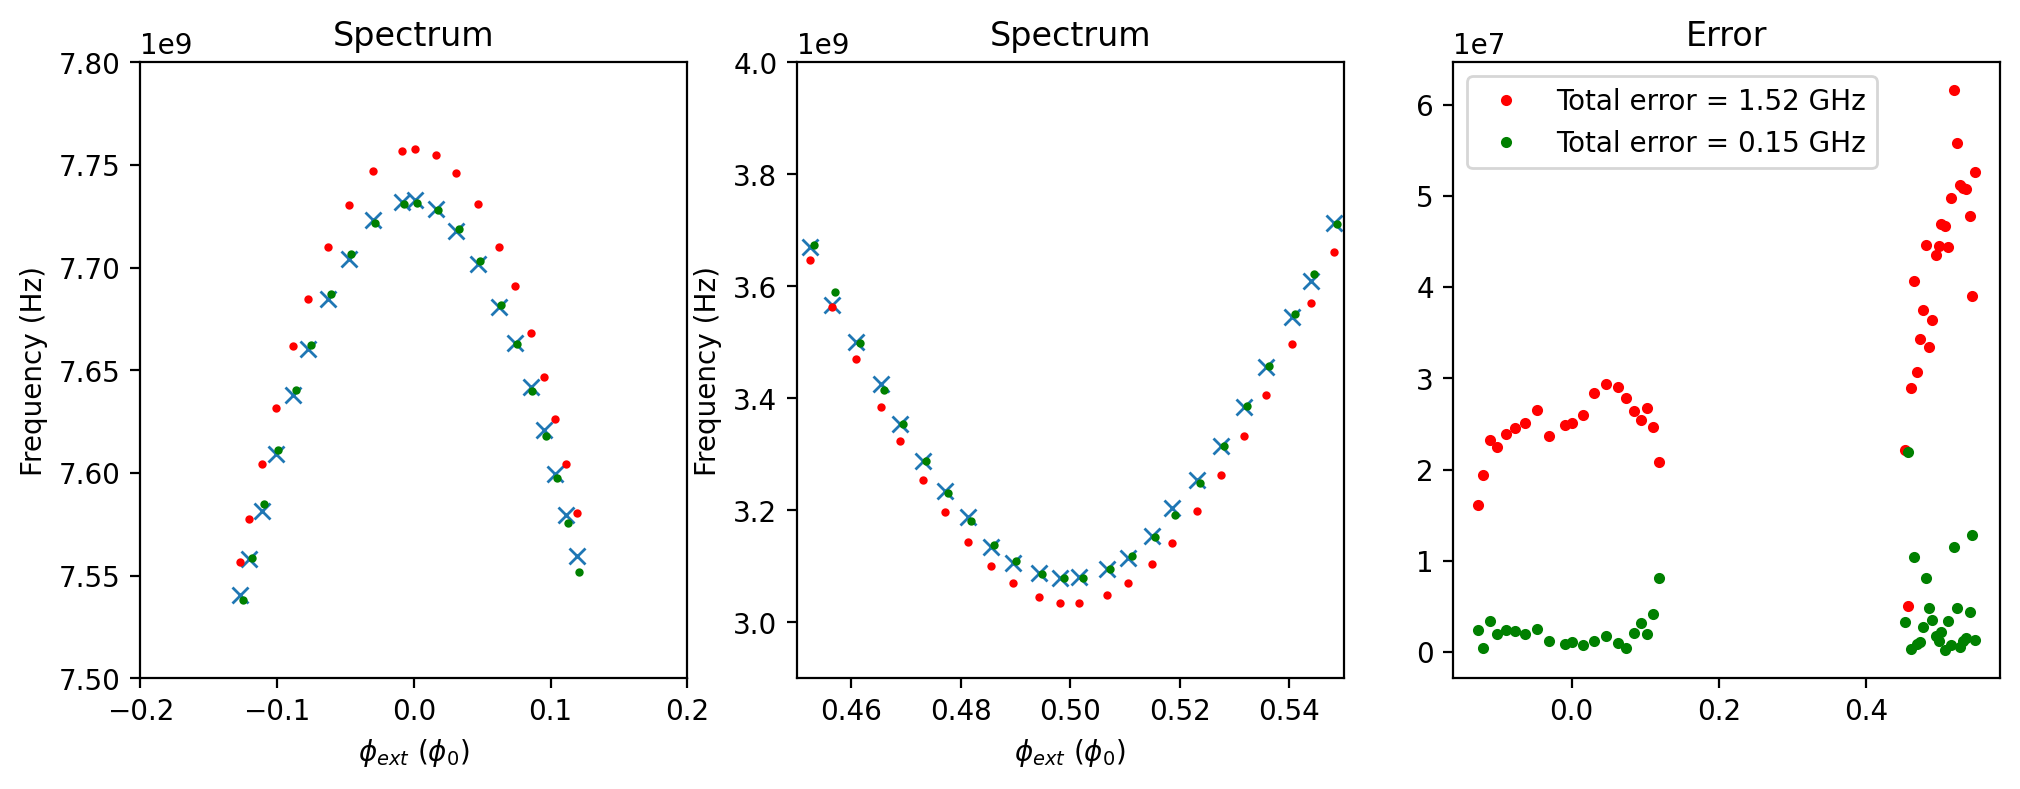

In [321]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax3.legend()

# Resonator 3

In [368]:
experiment_name = 'resonator_3'
load = False

### Load data

In [369]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

## Define cost function

In [370]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [371]:
CF_3, LF_3, EJ_3, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
CR_3, _, _, LR_3, _, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters('qubit 3')

C_int = 1300
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 10
crossing_index_2  = 8
LR_3, CR_3 = sq_ext.ωR_to_LR_CR(5.221, LR=LR_3)

parameter_names = ['C_int', 'CR_3', 'LR_3', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int, CR_3, LR_3 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_3, LF_3, EJ_3, Δ_3,  nmax_r, nmax_f ])
bounds= ((10,2000), (2,25),(30,170) ,(I0_guess*0.9, I0_guess*1.1), (I_origin_guess*1.1, I_origin_guess*0.9))

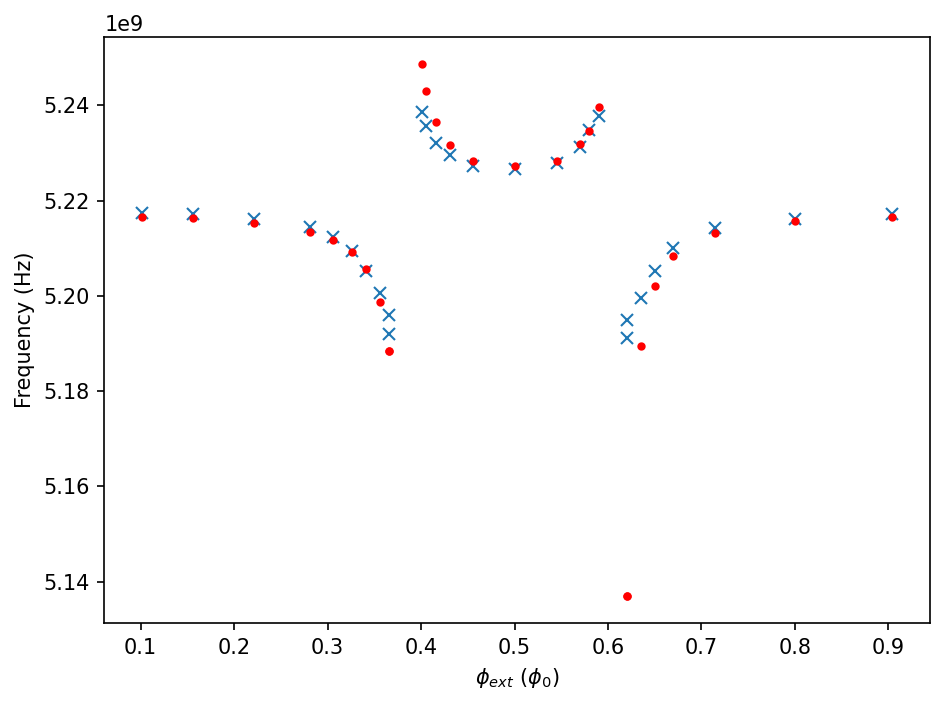

In [372]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
fig.tight_layout()

## Optimize or load previous optimization

In [361]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.006686863088740635
0.0066868630886344
0.006686863590457661
0.006686863154478932
0.00669339869161422
0.006697408836049822
9.863740513683572
0.0015537254206279185
0.0015537254205736871
0.0015537256213289563
0.001553725446679985
0.001553266608721599
0.001552197263839751
228.38972387863842
1.323799552793363
0.012657519978076043
0.0015340529287352655
0.0015340529286880372
0.0015340527359298923
0.0015340529013944146
0.0015335891528990707
0.0015326225587046663
0.000904577317171963
0.0009045773171434088
0.0009045775982550554
0.000904577354762934
0.0009050353682408092
0.0009035851835233607
0.004909609068175059
0.000742082254187817
0.0007420822541624348
0.0007420821501001591
0.0007420822394044681
0.0007422824353054556
0.0007415077195330082
0.01571343147877075
0.0005675593598687327
0.0005675593598459495
0.0005675593053091292
0.000567559351867712
0.0005677093549752171
0.0005679314274793846
0.0004974578933662871
0.0004974578933429384
0.0004974578787990253
0.0004974578908081191
0.00049750770491207

In [362]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

C_int = 1300.000
CR_3 = 11.245
LR_3 = 82.640
I0_guess = 0.002
I_origin_guess = -0.001


Optimized parameters 

C_int = 1300.000
CR_3 = 11.250
LR_3 = 82.641
I0_guess = 0.002
I_origin_guess = -0.001


## Plot fits and errors

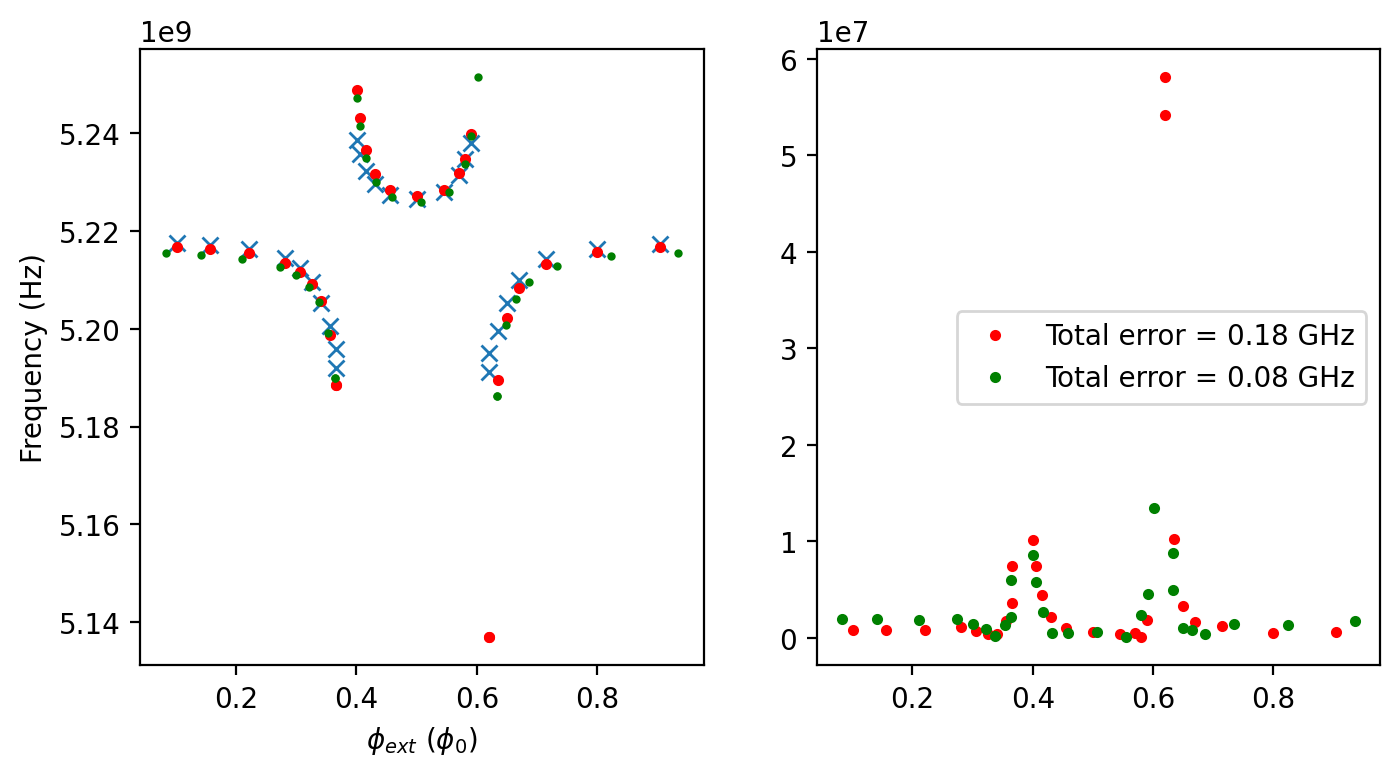

In [363]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Total error = {np.abs(ω_guess-ω_exp).sum()/1e9:.2f} GHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Total error = {np.abs(ω_opt-ω_exp).sum()/1e9:.2f} GHz'  )
ax2.legend()

# Qubit 3 and Resonator 3

In [380]:
experiment_name = 'resonator_and_qubit_3'
load = False


### Load spectral data and theoretical model

In [381]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_3')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_3')

In [382]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [399]:
CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int, CR_3, LR_3, I0_R_3, I_origin_R_3 = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_F = 24
crossing_index_1_R = 10
crossing_index_2_R = 8
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_3, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3, C_int, CR_3, LR_3, I0_R_3, I_origin_R_3]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0_F_3', 'I_origin_F_3',
                   'C_int', 'CR_3', 'LR_3', 'I0_R_3', 'I_origin_R_3']

bounds = ((20,30), (20,30), (4,15), (I0_F_3*0.9, I0_F_3*1.1), (I_origin_F_3*1.1, I_origin_F_3*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_3*0.9, I0_R_3*1.1), (I_origin_R_3*1.1, I_origin_R_3*0.9))

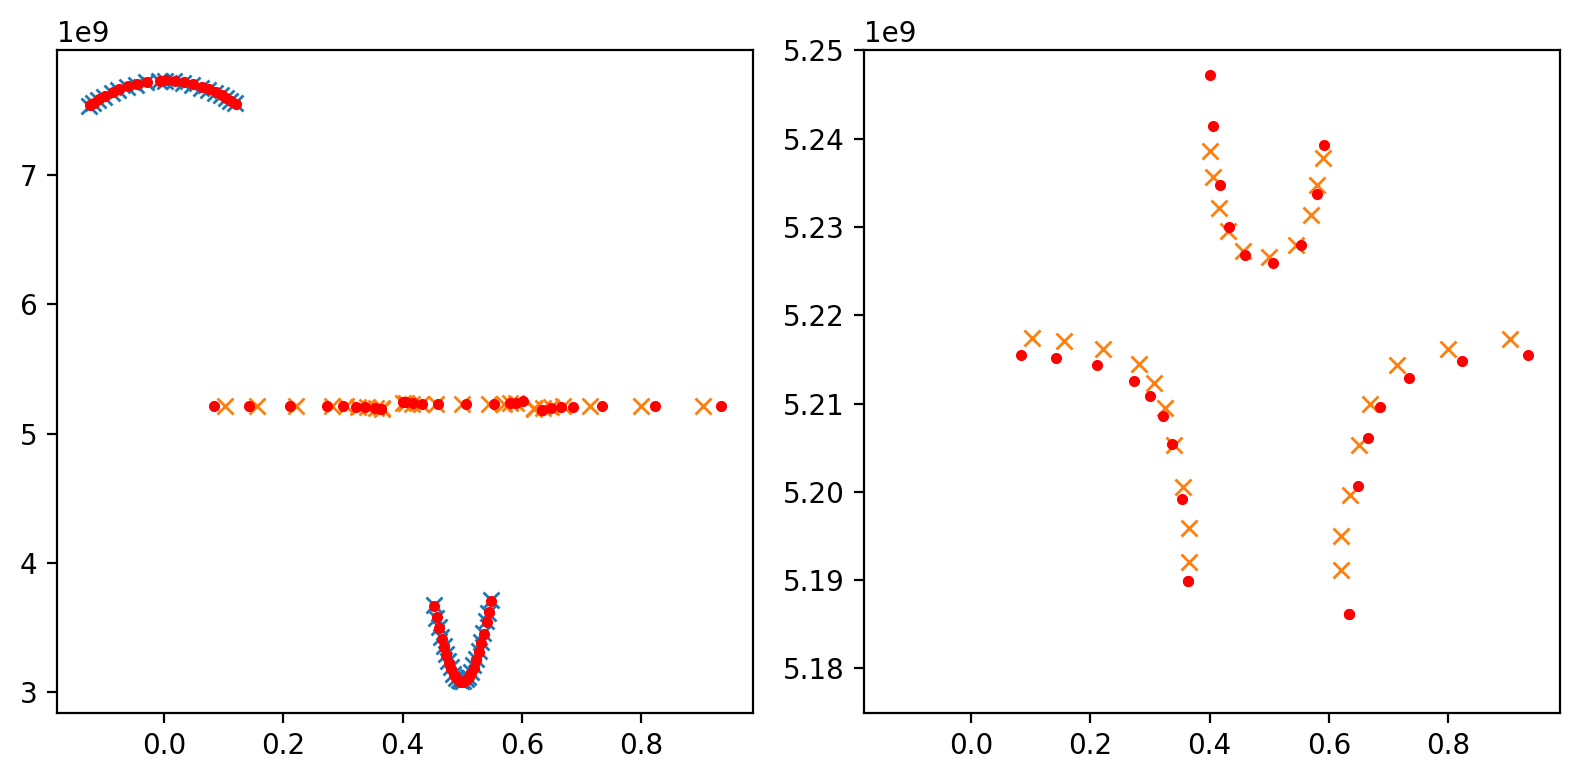

In [400]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([5.175e9,5.25e9])
fig.tight_layout()

### Optimize or load previous optimization

In [401]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

0.0045153955309891036
0.004515395505850136
0.004515395141165235
0.00451539860373348
0.004517219807583043
0.004516430672686385
0.004515395531123377
0.004515395692111471
0.00451539555084757
0.004515470373206605
0.00451544646550647
80.08780974798553
0.6777329295901942
0.010272893145449678
0.004499201927601931
0.004499201900979975
0.004499202309100727
0.004499204951561515
0.004497430434954874
0.004493052259886154
0.004499201927724517
0.004499202087179717
0.0044992019472618475
0.0044992546074882215
0.004499211471348749
27.014271828210745
0.17021370421847148
0.0025430503618318026
0.0025430504561062134
0.0025430504273851974
0.0025430503016437376
0.0025419510077324585
0.002540821781642587
0.0025430503619191104
0.0025430504842170543
0.0025430503771186903
0.0025428954985893927
0.0025426596741162256
11.067850286492618
0.011518047006373924
0.002510980509464719
0.002510980501653872
0.002510980492253405
0.002510980483973732
0.0025103940553594935
0.0025105299782522995
0.002510980509552182
0.002510980

In [402]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_3 = 26.470
LF_3 = 30.000
EJ_3 = 5.780
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int = 1300.000
CR_3 = 11.250
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


Optimized parameters 

CF_3 = 26.472
LF_3 = 29.988
EJ_3 = 5.764
I0_F_3 = 0.002
I_origin_F_3 = -0.001
C_int = 1000.000
CR_3 = 11.247
LR_3 = 82.641
I0_R_3 = 0.002
I_origin_R_3 = -0.001


### Plot fits and errors

(5175000000.0, 5250000000.0)

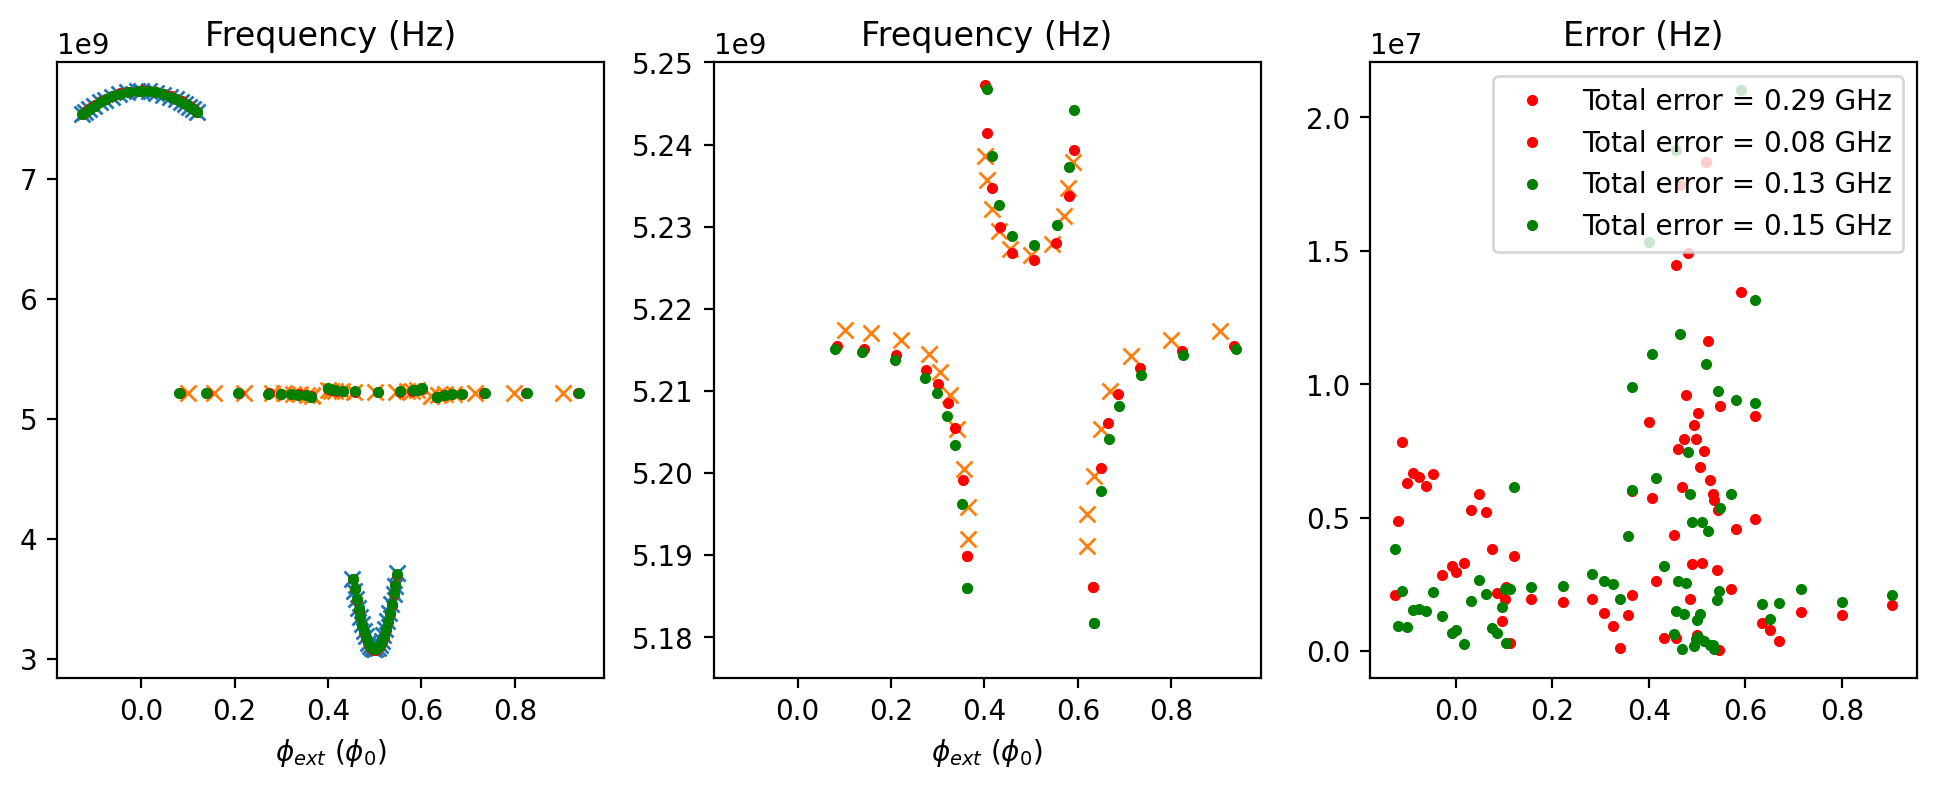

In [404]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Total error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Total error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Total error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).sum()/1e9:.2f} GHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Total error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).sum()/1e9:.2f} GHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([5.175e9,5.25e9])


# Qubit 1 - Qubit 2 avoided crossing while Qubit 3 is off-resonant

Move q2 through q1 which is at half-flux

In [405]:
with open(os.getcwd() + data_dir + r'/x__tt_q1_q2.pkl', 'rb') as f:
    x__tt_q1_q2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__tt_q1_q2.pkl', 'rb') as f:
    y__tt_q1_q2 = pickle.load(f)
x__tt_q1_q2 = np.concatenate([x__tt_q1_q2[0], x__tt_q1_q2[1] ])
y__tt_q1_q2 = np.concatenate([y__tt_q1_q2[0], y__tt_q1_q2[1] ])

Text(0.5, 0, 'Sweep parameter (a.u.)')

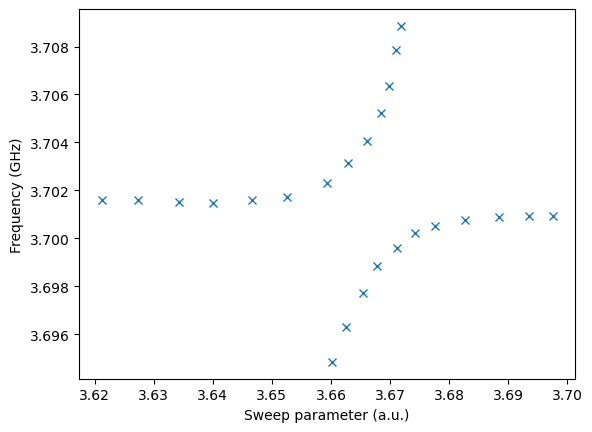

In [415]:
plt.plot(x__tt_q1_q2, y__tt_q1_q2, 'x')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameter (a.u.)')

In [411]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']

In [435]:
# φ_ext_values = np.linspace(0.5, 0.55, 30)
φ_ext_values = np.linspace(0.5, 0.55, len(x__tt_q1_q2))

parameters = C_int
data_set = [CF_1, LF_1, EJ_1, CF_2, LF_2, EJ_2, φ_ext_values, y__tt_q1_q2, nmax_f]

In [444]:
def qubit_spectrum(parameters, data_set, out='error'):
    C_int = parameters
    CF_1, LF_1, EJ_1, CF_2, LF_2, EJ_2, φ_ext_values, ω_exp, nmax_f  = data_set

    qubit_1 = sq_ext.sq_fluxonium(C_F_eff=CF_1, L_F_eff=LF_1, EJ=EJ_1, nmax_f=nmax_f)
    H_1 = qubit_1.hamiltonian()
    Q_1 = qubit_1.charge_op(0)
    I = qt.identity(H_1.shape[0])
    
    qubit_2 = sq_ext.sq_fluxonium(C_F_eff=CF_2, L_F_eff=LF_2, EJ=EJ_2, nmax_f=nmax_f)
    loop = qubit_2.loops[0]
    
    ω_vs_φ_ext = np.zeros([len(φ_ext_values),2])
    for i, φ_ext in enumerate(φ_ext_values):
        loop.set_flux(φ_ext)
        H_2 = qubit_2.hamiltonian()
        Q_2 = qubit_2.charge_op(0)
        H = qt.tensor(H_1, I) + qt.tensor(I,H_2) + C_int **-1 * fF ** -1 * qt.tensor(Q_1, Q_2)
        ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]

    if out == 'error':
        error = np.sum((ω_vs_φ_ext - ω_exp * 1e-9) ** 2)
        print(error)
        return error

    elif out == 'spectrum':
        return φ_ext_values, ω_vs_φ_ext * 1e9
    


In [577]:
φ_ext_values = np.linspace(0.5, 0.5325, 100)
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
LF_1-=0.045
data_set = [CF_1, LF_1, EJ_1, CF_2, LF_2, EJ_2, φ_ext_values, y__tt_q1_q2, nmax_f]
C_int = 4500
# C_int = 1200
φ_ext_values, ω_vs_φ_ext = qubit_spectrum(C_int, data_set, out='spectrum')

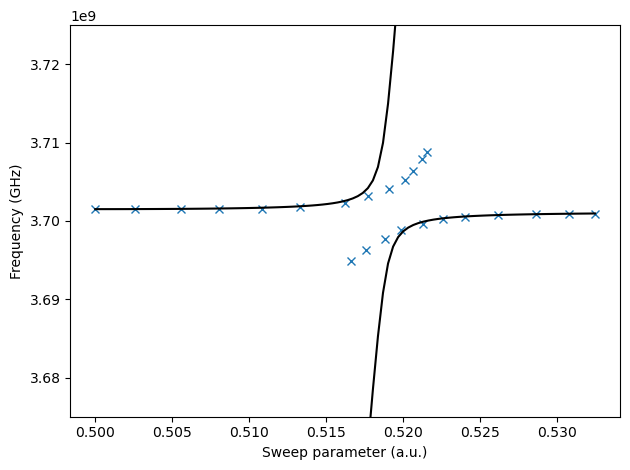

In [578]:
fig, ax = plt.subplots()


# ax.plot((x__tt_q1_q2-x__tt_q1_q2.min())/(x__tt_q1_q2.max()-x__tt_q1_q2.min())/2+0.5, y__tt_q1_q2*1e9, 'x')
ax.plot((x__tt_q1_q2-x__tt_q1_q2.min())/(x__tt_q1_q2.max()-x__tt_q1_q2.min()) * (φ_ext_values.max()- φ_ext_values.min())+0.5, y__tt_q1_q2*1e9, 'x')
ax.plot(φ_ext_values, ω_vs_φ_ext, 'k')
# ax.plot(φ_ext_values, (ω_vs_φ_ext-3.701e9)*0.085+3.701e9, '.k')
ax.set_ylim([3.675e9,3.725e9])
ax.set_ylabel('Frequency (GHz)')
ax.set_xlabel('Sweep parameter (a.u.)')

fig.tight_layout()

In [573]:
φ_ext_values = np.linspace(0.5, 0.5325, 100)
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
LF_1-=0.045
data_set = [CF_1, LF_1, EJ_1, CF_2, LF_2, EJ_2, φ_ext_values, y__tt_q1_q2, nmax_f]
C_int = 1200
φ_ext_values, ω_vs_φ_ext = qubit_spectrum(C_int, data_set, out='spectrum')

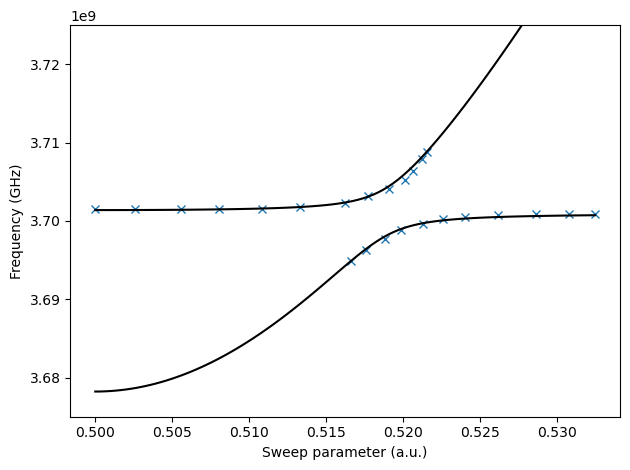

In [575]:
fig, ax = plt.subplots()
# ax.plot((x__tt_q1_q2-x__tt_q1_q2.min())/(x__tt_q1_q2.max()-x__tt_q1_q2.min())/2+0.5, y__tt_q1_q2*1e9, 'x')
ax.plot((x__tt_q1_q2-x__tt_q1_q2.min())/(x__tt_q1_q2.max()-x__tt_q1_q2.min()) * (φ_ext_values.max()- φ_ext_values.min())+0.5, y__tt_q1_q2*1e9, 'x')
# ax.plot(φ_ext_values, ω_vs_φ_ext, '.k')
ax.plot(φ_ext_values, (ω_vs_φ_ext-3.701e9)*0.085+3.701e9, 'k')
ax.set_ylim([3.675e9,3.725e9])
ax.set_ylabel('Frequency (GHz)')
ax.set_xlabel('Sweep parameter (a.u.)')

fig.tight_layout()